<a href="https://colab.research.google.com/github/Chew17095779/WQD7002-Data-Science-Research-Project-/blob/main/WQD_7002_Research_Project_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
# import necessary libraries
import pandas as pd
import os
import io
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from tensorflow.keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from keras.layers import InputLayer 
from keras.layers import Dropout 
from keras.constraints import maxnorm
from tensorflow.keras.utils import plot_model
from keras.layers import BatchNormalization
from keras.utils import normalize,to_categorical
import logging
from sklearn.linear_model import Lasso
from keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import InputLayer 
from sklearn.ensemble import RandomForestClassifier
from keras.constraints import maxnorm
from keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow.keras import Input
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from matplotlib import pyplot
from google.colab import files
tf.get_logger().setLevel(logging.ERROR)
tf.config.run_functions_eagerly(True)

In [ ]:
# Read data and split into training and test data.
from google.colab import files
uploaded = files.upload()

Saving CR_Clean_Copy_ver2.csv to CR_Clean_Copy_ver2.csv


In [ ]:
# Store dataset in a Pandas Dataframe
df = pd.read_csv(io.BytesIO(uploaded['CR_Clean_Copy_ver2.csv']))

# **Read Data**

In [ ]:
df = pd.read_csv('CR_Clean_Copy_ver2.csv') 
print(df)

        Race                   Education_level  \
0     Others  Form 6 / pre-university graduate   
1    Chinese                           Unknown   
2     Others       College/university graduate   
3      Malay          Some secondary education   
4      Malay                           Unknown   
..       ...                               ...   
179   Indian                   Form 5 graduate   
180  Chinese                           Unknown   
181    Malay                           Unknown   
182    Malay       College/university graduate   
183    Malay                Technical graduate   

                      Patient_occupation Health_funding CR_Intake  \
0                     Government servant   Fully Funded       Yes   
1    Self-employed (excludes housewives)    Self funded       Yes   
2    Self-employed (excludes housewives)    Self funded       Yes   
3                     Government servant   Fully Funded       Yes   
4                     Government servant   Fully Funde

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Race                                                 184 non-null    object 
 1   Education_level                                      184 non-null    object 
 2   Patient_occupation                                   184 non-null    object 
 3   Health_funding                                       184 non-null    object 
 4   CR_Intake                                            184 non-null    object 
 5   Prescribed_Sessions                                  184 non-null    object 
 6   AACVPR_Risk_Category                                 184 non-null    object 
 7   CR_Adherence                                         184 non-null    object 
 8   Pre_Tobacco                                          184 non-null    o

In [ ]:
# Drop rows for patients who did not enroll and Unknown in CR
df.drop(df.index[(df["AACVPR_Risk_Category"] == "Did Not Enroll CR")],axis=0,inplace=True)
df.drop(df.index[(df["AACVPR_Risk_Category"] == "Unknown")],axis=0,inplace=True)


In [ ]:
# Check whether there is missing data in all columns
count = df.count()
print(count)

Race                                                   173
Education_level                                        173
Patient_occupation                                     173
Health_funding                                         173
CR_Intake                                              173
Prescribed_Sessions                                    173
AACVPR_Risk_Category                                   173
CR_Adherence                                           173
Pre_Tobacco                                            173
Post_Tobacco                                           171
Pre_Exercise_Stress_Test                               173
Post_Exercise_Stress_Test                              126
Exercise_frequency_mins_week                           166
Exercise_frequency_sessions_week                       166
Exercise_intensity                                     107
Anxiety_Scores                                         108
Depression_Scores                                      1

In [ ]:
# Recheck whether there is missing values
df.isna().sum()

Race                                                    0
Education_level                                         0
Patient_occupation                                      0
Health_funding                                          0
CR_Intake                                               0
Prescribed_Sessions                                     0
AACVPR_Risk_Category                                    0
CR_Adherence                                            0
Pre_Tobacco                                             0
Post_Tobacco                                            2
Pre_Exercise_Stress_Test                                0
Post_Exercise_Stress_Test                              47
Exercise_frequency_mins_week                            7
Exercise_frequency_sessions_week                        7
Exercise_intensity                                     66
Anxiety_Scores                                         65
Depression_Scores                                      65
Pre_RTW       

# **Data Preprocessing**

In [ ]:
#Imputation with median for numerical columns, and mode for categorical columns
df[['Exercise_intensity']] = df[[ 'Exercise_intensity']].fillna(df[['Exercise_intensity']].median())
df[['Anxiety_Scores', 'Depression_Scores']] = df[['Anxiety_Scores', 'Depression_Scores']].fillna(df[['Anxiety_Scores', 'Depression_Scores']].median())
df['Unexpected_Events'] = df['Unexpected_Events'].fillna(df['Unexpected_Events'].mode()[0])
df[['Duration_Between_Ward_Enrollment', 'Duration_CR']] = df[['Duration_Between_Ward_Enrollment', 'Duration_CR']].fillna(df[['Duration_Between_Ward_Enrollment', 'Duration_CR']].median())
df['Post_Tobacco'] = df['Post_Tobacco'].fillna(df['Post_Tobacco'].mode()[0])
df['Post_BMI_range'] = df['Post_BMI_range'].fillna(df['Post_BMI_range'].mode()[0])
df['Pre_Left_Ventricle_EF'] = df['Pre_Left_Ventricle_EF'].fillna(df['Pre_Left_Ventricle_EF'].mode()[0])
df['Pre_Peak_Heart_Rate_range'] = df['Pre_Peak_Heart_Rate_range'].fillna(df['Pre_Peak_Heart_Rate_range'].mode()[0])
df['Post_Peak_Heart_Rate_range'] = df['Post_Peak_Heart_Rate_range'].fillna(df['Post_Peak_Heart_Rate_range'].mode()[0])
df['Pre_METs_range'] = df['Pre_METs_range'].fillna(df['Pre_METs_range'].mode()[0])
df['Post_Peak_METs_range'] = df['Post_Peak_METs_range'].fillna(df['Post_Peak_METs_range'].mode()[0])
df['Post_Exercise_Stress_Test'] = df['Post_Exercise_Stress_Test'].fillna(df['Post_Exercise_Stress_Test'].mode()[0])
df['Triglyceride_cat'] = df['Triglyceride_cat'].fillna(df['Triglyceride_cat'].mode()[0])
df[['Exercise_frequency_mins_week', 'Exercise_frequency_sessions_week']] = df[['Exercise_frequency_mins_week', 'Exercise_frequency_sessions_week']].fillna(df[['Exercise_frequency_mins_week', 'Exercise_frequency_sessions_week']].median())
df['HDL_cat'] = df['HDL_cat'].fillna(df['HDL_cat'].mode()[0])
df['LDL_cat'] = df['LDL_cat'].fillna(df['LDL_cat'].mode()[0])
df['HbA1c_cat'] = df['HbA1c_cat'].fillna(df['HbA1c_cat'].mode()[0])
df['Pre_BP_cat'] = df['Pre_BP_cat'].fillna(df['Pre_BP_cat'].mode()[0])
df['CR_BP_cat'] = df['CR_BP_cat'].fillna(df['CR_BP_cat'].mode()[0])
df['Exercise_intensity'] = df['Exercise_intensity'].fillna(df['Exercise_intensity'].mode()[0])
df['Pre_BMI_range'] = df['Pre_BMI_range'].fillna(df['Pre_BMI_range'].mode()[0])
df[['Age']] = df[['Age']].fillna(df[['Age']].median())

In [ ]:
# Recheck whether there is missing values
df.isna().sum()

Race                                                   0
Education_level                                        0
Patient_occupation                                     0
Health_funding                                         0
CR_Intake                                              0
Prescribed_Sessions                                    0
AACVPR_Risk_Category                                   0
CR_Adherence                                           0
Pre_Tobacco                                            0
Post_Tobacco                                           0
Pre_Exercise_Stress_Test                               0
Post_Exercise_Stress_Test                              0
Exercise_frequency_mins_week                           0
Exercise_frequency_sessions_week                       0
Exercise_intensity                                     0
Anxiety_Scores                                         0
Depression_Scores                                      0
Pre_RTW                        

In [ ]:
# Categorise age to age group
df.loc[(df.Age >60 ),  'AgeGroup'] = 'Elderly'
df.loc[(df.Age <= 60 ),  'AgeGroup'] = 'Adult'
df.drop(['Age'], axis=1)

# Categorise duration CR
df.loc[(df.Duration_CR >90 ),  'Duration_CR_cat'] = 'Normal'
df.loc[(df.Duration_CR <= 90 ),  'Duration_CR_cat'] = 'Long'

In [ ]:
#Regroup Educational Level
df['Education_level'] = np.where( (df['Education_level'] == 'Unknown'),
                                           'Lower than pre-university',df['Education_level'])
df['Education_level'] = np.where( (df['Education_level'] == 'Std 6 or less'),
                                           'Lower than pre-university',df['Education_level'])
df['Education_level'] = np.where( (df['Education_level'] == 'Form 5 graduate'),
                                           'Lower than pre-university',df['Education_level'] )
df['Education_level'] = np.where( (df['Education_level'] == 'Some secondary education'),
                                           'Lower than pre-university',df['Education_level'] )
df['Education_level'] = np.where( (df['Education_level'] == 'Form 6 / pre-university graduate'),
                                           'HE Qualification',df['Education_level'])     
df['Education_level'] = np.where( (df['Education_level'] == 'College/university graduate'),
                                           'HE Qualification',df['Education_level']  )  
df['Education_level'] = np.where( (df['Education_level'] == 'Post-graduate'),
                                           'HE Qualification',df['Education_level'])  
df['Education_level'] = np.where( (df['Education_level'] == 'Technical graduate'),
                                           'HE Qualification',df['Education_level']  )   

In [ ]:
df.drop(['Duration_CR'], axis=1)
df.drop(['CR_Intake'], axis=1)

,Race,Education_level,Patient_occupation,Health_funding,Prescribed_Sessions,AACVPR_Risk_Category,CR_Adherence,Pre_Tobacco,Post_Tobacco,Pre_Exercise_Stress_Test,Post_Exercise_Stress_Test,Exercise_frequency_mins_week,Exercise_frequency_sessions_week,Exercise_intensity,Anxiety_Scores,Depression_Scores,Pre_RTW,Post_RTW,Pre_Return_to_drive,Post_Return_to_drive,Pre_erectile_dysfunction,Post_erectile_dysfunction,MACCE,Unexpected_Events,Age,Gender,Pre_Left_Ventricle_EF,Admission_Diagnosis_Angina,Admission_Diagnosis_Arrhythmia,Admission_Diagnosis_CABG,Admission_Diagnosis_Heart Failure,Admission_Diagnosis_NSTEMI,Admission_Diagnosis_Other cardiothoracic procedures,Admission_Diagnosis_PCI,Admission_Diagnosis_STEMI,Admission_Diagnosis_Valve replacement(s),Risk_Factors_DM Type 2,Risk_Factors_High Lipid Profile,Risk_Factors_Hypertension,Risk_Factors_None of the above,Risk_Factors_Unknown,Total_Risk_Factors,Past_CV_Chronic AF,Past_CV_Hx of HF,Past_CV_Implantable Cardiac Defibrillator,Past_CV_None of the above,Past_CV_Prev CABG,Past_CV_Prev MI,Past_CV_Prev PCI,Past_CV_Prev Valve Surgery,Past_CV_Unknown,Triglyceride_cat,HDL_cat,LDL_cat,HbA1c_cat,Pre_BP_cat,CR_BP_cat,Pre_Medication_ACEI/ARB,Pre_Medication_Aspirin,Pre_Medication_Beta-antagonist,Pre_Medication_Statin,Post_Medication_ACEI/ARB,Post_Medication_Aspirin,Post_Medication_Beta-antagonist,Post_Medication_Statin*,CR_Medication_ACEI/ARB,CR_Medication_Aspirin,CR_Medication_Beta-antagonist,CR_Medication_Statin*,CR_Completion,Duration_Between_Ward_Enrollment,Duration_CR,Pre_BMI_range,Post_BMI_range,Pre_Peak_Heart_Rate_range,Post_Peak_Heart_Rate_range,Pre_METs_range,Post_Peak_METs_range,AgeGroup,Duration_CR_cat
0,Others,HE Qualification,Government servant,Fully Funded,8 weeks,Low,Yes,Never smoked,Abstaining,Treadmill,Treadmill,60.0,1.0,5.0,6.0,4.0,1,1,0,1,0,0,0,0.0,38.0,Female,more then 50% with no failure symptoms,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,Normal,Intermediate risk,Intermediate risk,Normal,Optimal,Optimal,0,0,0,0,0,0,0,1,0,0,0,0,Yes,114.0,126.0,Normal,Normal,Moderate,Moderate,Vigorous Intensity,Vigorous Intensity,Adult,Normal
1,Chinese,Lower than pre-university,Self-employed (excludes housewives),Self funded,8 weeks,Intermediate,Yes,Former smoker,Abstaining,Treadmill,Treadmill,60.0,5.0,4.0,6.0,4.0,0,0,1,1,0,0,0,1.0,53.0,Male,more then 50% with no failure symptoms,0,0,0,0,0,0,0,1,0,1,1,1,0,0,3,0,0,0,0,0,0,0,0,1,High,Intermediate risk,Low Risk,Prediabetes,Optimal,Normal,1,1,0,1,1,1,0,1,1,1,0,1,Yes,116.0,123.0,Obesity,Obesity,Moderate,Moderate,Vigorous Intensity,Vigorous Intensity,Adult,Normal
2,Others,HE Qualification,Self-employed (excludes housewives),Self funded,8 weeks,Intermediate,Yes,Never smoked,Abstaining,6MWT only,6MWT only,30.0,7.0,7.0,6.0,4.0,0,0,0,1,0,0,0,0.0,58.0,Male,more then 50% with no failure symptoms,0,0,1,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,Normal,High Risk,Low Risk,Normal,Isolated Systolic Hypertension,Isolated Systolic Hypertension,1,1,1,1,1,1,1,1,1,1,1,1,Yes,151.0,92.0,Overweight,Overweight,Moderate,Moderate,Moderate Intensity,Vigorous Intensity,Adult,Normal
3,Malay,Lower than pre-university,Government servant,Fully Funded,8 weeks,Intermediate,Yes,Former smoker,Abstaining,Treadmill,Treadmill,45.0,5.0,4.0,6.0,4.0,0,0,1,1,0,0,0,0.0,62.0,Male,less then 40%,0,0,1,0,0,0,0,0,1,1,1,1,0,0,3,0,0,0,0,0,1,0,0,0,Normal,Intermediate risk,Low Risk,Diabetes,At Risk,At Risk,0,1,0,1,0,1,1,1,0,1,0,1,Yes,88.0,69.0,Normal,Normal,Moderate,Moderate,Vigorous Intensity,Vigorous Intensity,Elderly,Long
4,Malay,Lower than pre-university,Government servant,Fully Funded,8 weeks,Low,Yes,Current smoker,Abstaining,Treadmill,Treadmill,60.0,1.0,5.0,6.0,4.0,0,0,0,0,0,0,0,0.0,60.0,Male,more then 50% with no failure symptoms,0,0,1,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,0,1,Normal,Intermediate risk,High risk,Normal,Isolated Systolic Hypertension,At Risk,0,0,1,1,0,0,1,1,0,0,1,1,Yes,29.0,126.0,Obesity,Overweight,Hard,Moderate,Vigorous Intensity,Vigorous Intensity,Adult,Normal
...,...,...

# **EDA**

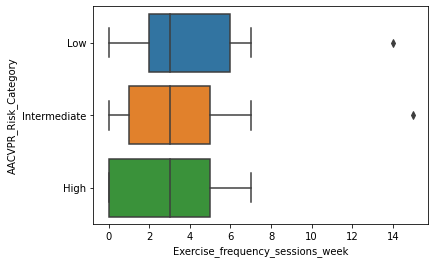

In [ ]:
sns.boxplot(data=df, x="Exercise_frequency_sessions_week", y="AACVPR_Risk_Category")

Text(0.5, 1.0, 'Exercise Intensity by AACVPR Risk Level')

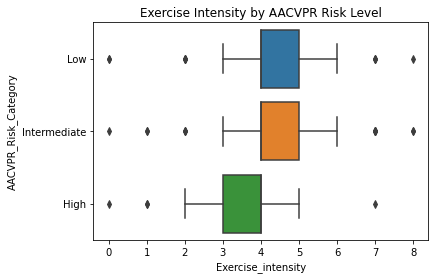

In [ ]:
sns.boxplot(data=df, x="Exercise_intensity", y="AACVPR_Risk_Category").set_title('Exercise Intensity by AACVPR Risk Level')

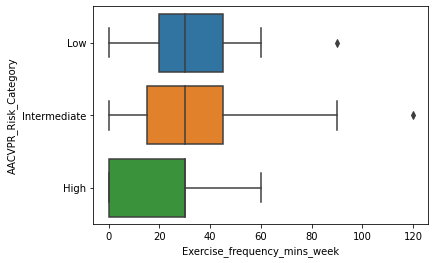

In [ ]:
sns.boxplot(data=df, x="Exercise_frequency_mins_week", y="AACVPR_Risk_Category")

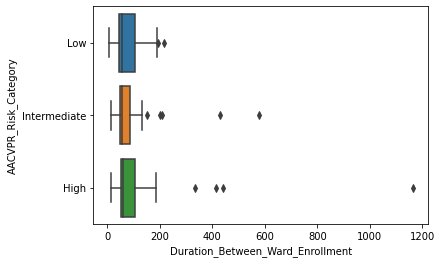

In [ ]:
sns.boxplot(data=df, x="Duration_Between_Ward_Enrollment", y="AACVPR_Risk_Category")

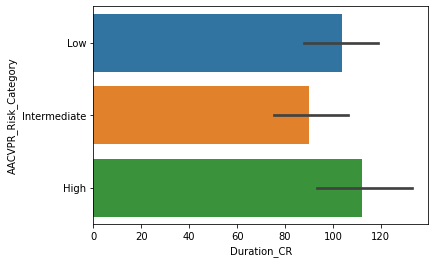

In [ ]:
sns.barplot(data=df, x="Duration_CR", y="AACVPR_Risk_Category")

Gender
Female     17
Male      156
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Total number of male and female ')

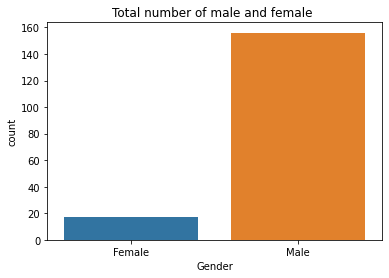

In [ ]:
# Group by and count target variable 'Gender'
df_count_gender = df.groupby(['Gender'])['Gender'].count()
print(df_count_gender)

sns.countplot(x=df["Gender"]).set_title('Total number of male and female ')

Race
Chinese    55
Indian     49
Malay      65
Others      4
Name: Race, dtype: int64


Text(0.5, 1.0, 'Total number of patients by Race ')

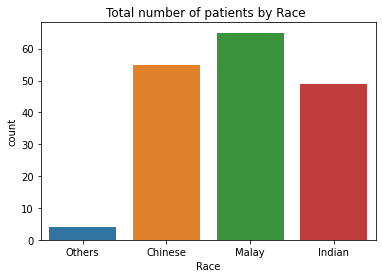

In [ ]:
# Group by and count for race
df_race = df.groupby(['Race'])['Race'].count()
print(df_race)

sns.countplot(x=df["Race"]).set_title('Total number of patients by Race ')

Education_level
HE Qualification              37
Lower than pre-university    136
Name: Education_level, dtype: int64


Text(0.5, 1.0, 'Total number of patients by Educational Level')

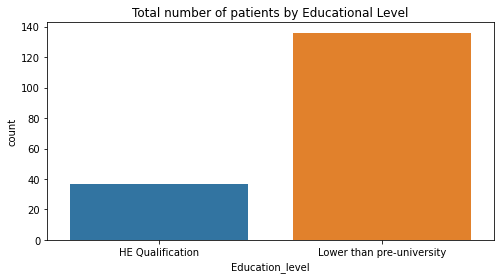

In [ ]:
# Group by and count for educational level
df_edu = df.groupby(['Education_level'])['Education_level'].count()
print(df_edu)
plt.figure(figsize=(8,4))
sns.countplot(x=df["Education_level"]).set_title('Total number of patients by Educational Level')

Patient_occupation
Government servant                      33
Private employment                     105
Self-employed (excludes housewives)     35
Name: Patient_occupation, dtype: int64


Text(0.5, 1.0, 'Total number of patients by Occupation')

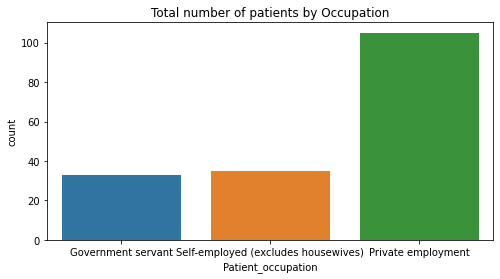

In [ ]:
# Group by and count for occupation
df_occ = df.groupby(['Patient_occupation'])['Patient_occupation'].count()
print(df_occ)
plt.figure(figsize=(8,4))

sns.countplot(x=df["Patient_occupation"]).set_title('Total number of patients by Occupation')

AACVPR_Risk_Category
High            53
Intermediate    57
Low             63
Name: AACVPR_Risk_Category, dtype: int64


Text(0.5, 1.0, 'Total number of patients under different AACVPR Risk Category')

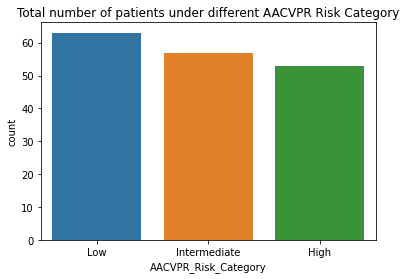

In [ ]:
# Group by and count target variable 'AACVPR_Risk_Category'
df_count_target = df.groupby(['AACVPR_Risk_Category'])['AACVPR_Risk_Category'].count()
print(df_count_target)

sns.countplot(x=df["AACVPR_Risk_Category"]).set_title('Total number of patients under different AACVPR Risk Category')

Exercise_intensity
0.0     4
1.0     4
2.0    16
3.0    18
4.0    81
5.0    27
6.0    11
7.0     9
8.0     3
Name: Exercise_intensity, dtype: int64


Text(0.5, 1.0, 'Total number of patients under different Exercise_Intensity')

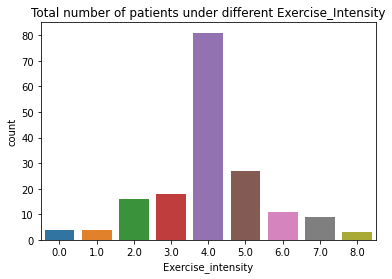

In [ ]:
# Group by and count target variable 'AACVPR_Risk_Category'
df_count_target = df.groupby(['Exercise_intensity'])['Exercise_intensity'].count()
print(df_count_target)

sns.countplot(x=df["Exercise_intensity"]).set_title('Total number of patients under different Exercise_Intensity')

In [ ]:
df.describe()

,Exercise_frequency_mins_week,Exercise_frequency_sessions_week,Exercise_intensity,Anxiety_Scores,Depression_Scores,Pre_RTW,Post_RTW,Pre_Return_to_drive,Post_Return_to_drive,Pre_erectile_dysfunction,...,Post_Medication_ACEI/ARB,Post_Medication_Aspirin,Post_Medication_Beta-antagonist,Post_Medication_Statin*,CR_Medication_ACEI/ARB,CR_Medication_Aspirin,CR_Medication_Beta-antagonist,CR_Medication_Statin*,Duration_Between_Ward_Enrollment,Duration_CR
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,29.257225,3.265896,4.057803,5.676301,4.248555,0.606936,0.687861,0.809249,0.832370,0.231214,...,0.450867,0.878613,0.554913,0.867052,0.358382,0.699422,0.473988,0.699422,88.595376,101.843931
std,21.972076,2.659744,1.489151,2.048642,2.330675,0.489849,0.464711,0.394034,0.374622,0.422833,...,0.499024,0.327525,0.498418,0.340504,0.480917,0.459840,0.500772,0.459840,111.785761,67.337694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,15.000000,1.000000,4.000000,5.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,48.000000,62.000000
50%,30.000000,3.000000,4.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,56.000000,98.000000
75%,45.000000,5.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.000000,126.000000
max,120.000000,15.000000,8.000000,11.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1165.000000,469.000000


Text(0.5, 1.0, 'Age by AACVPR Risk Category')

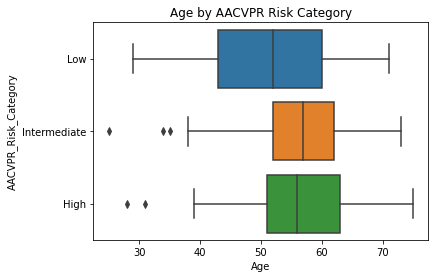

In [ ]:
sns.boxplot(data=df, x="Age", y="AACVPR_Risk_Category").set_title('Age by AACVPR Risk Category')

Text(0.5, 1.0, 'Duration of CR by AACVPR Risk Category')

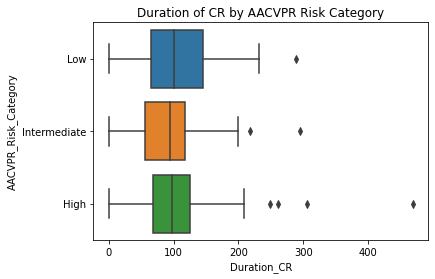

In [ ]:
sns.boxplot(data=df, x="Duration_CR", y="AACVPR_Risk_Category").set_title('Duration of CR by AACVPR Risk Category')

Text(0.5, 1.0, 'CR Duration')

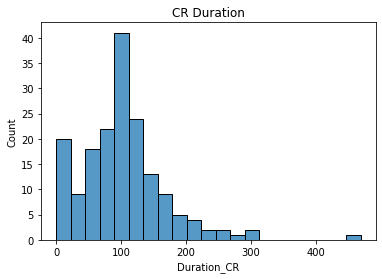

In [ ]:
sns.histplot(data=df, x="Duration_CR").set_title('CR Duration')

Text(0.5, 1.0, 'Age')

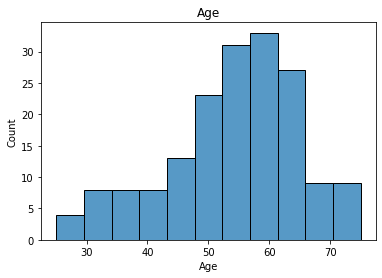

In [ ]:
sns.histplot(data=df, x="Age").set_title('Age')

Text(0.5, 1.0, 'Exercise_frequency_mins_week')

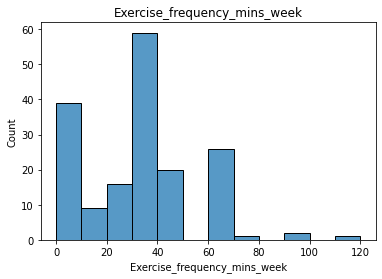

In [ ]:
sns.histplot(data=df, x="Exercise_frequency_mins_week").set_title('Exercise_frequency_mins_week')

In [ ]:
corr=df.corr()

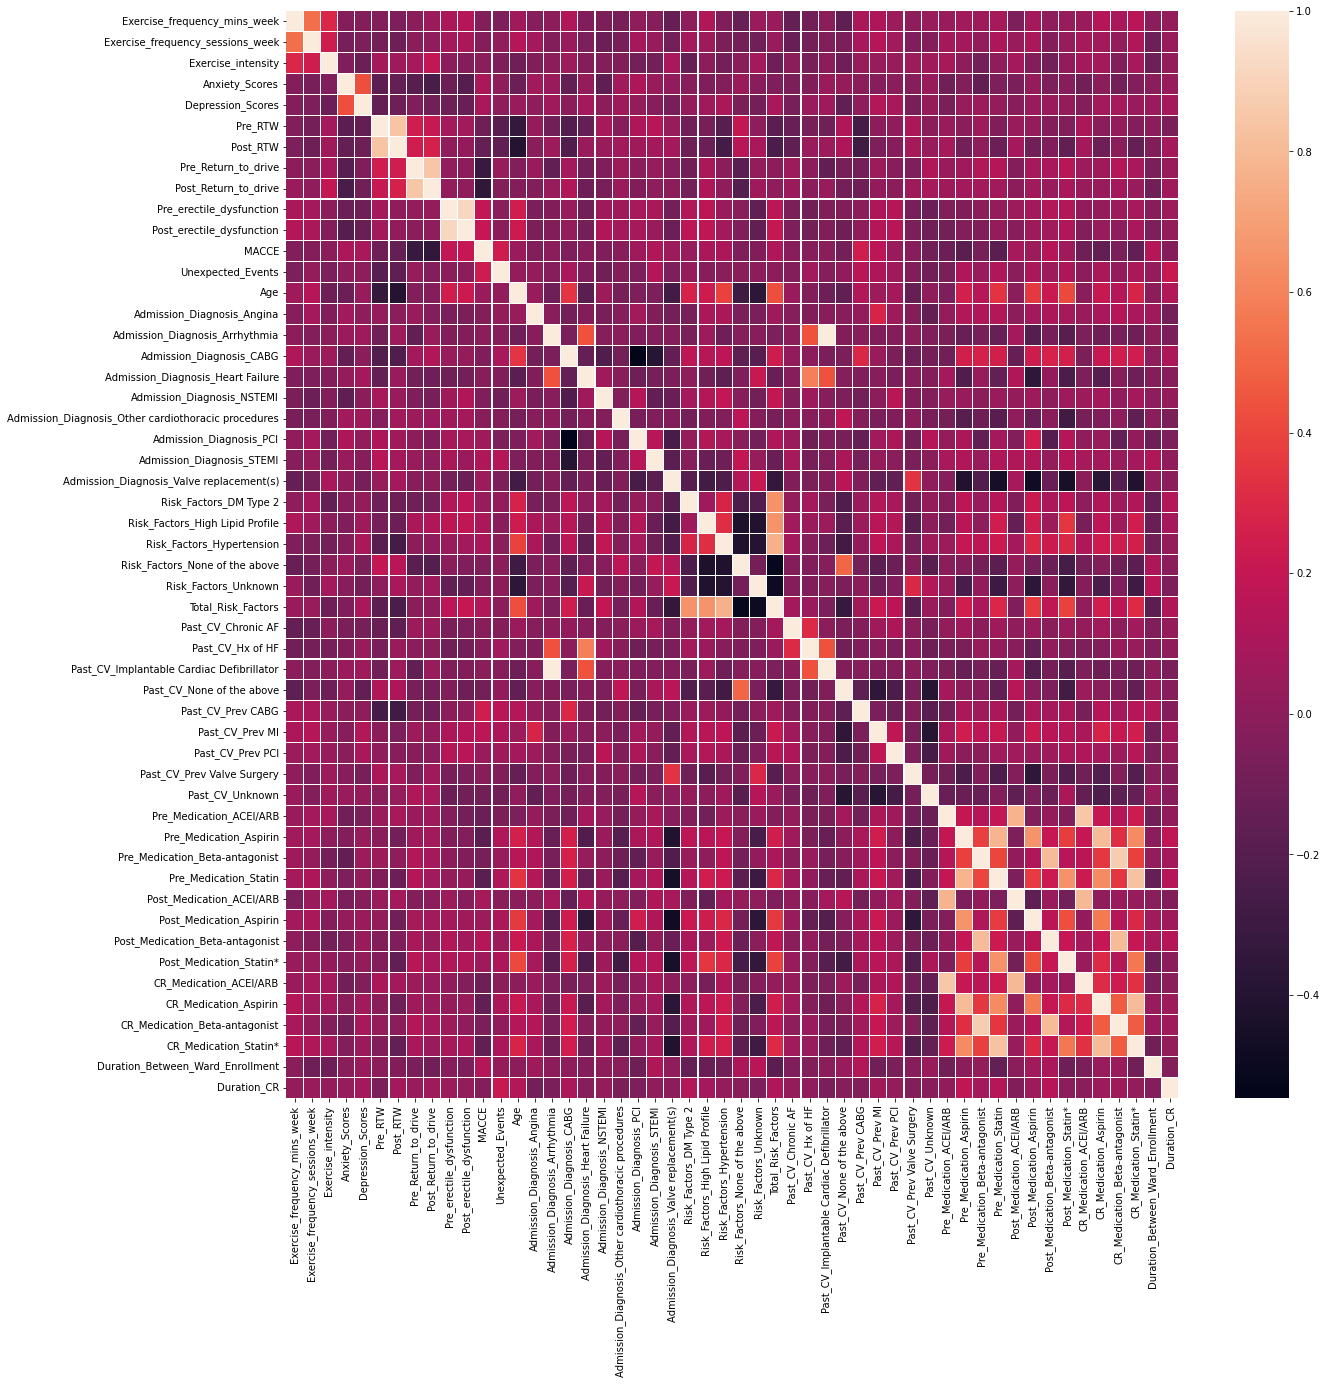

In [ ]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(20, 20))

#Correlation plot

hm2 = sns.heatmap(corr, 
                 linewidths=.1)
plt.show()

# **RFE**

## **Preprocess for RFE**

In [ ]:
#@title LABEL ENCODER

le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le5 = preprocessing.LabelEncoder()
le6 = preprocessing.LabelEncoder()
le7 = preprocessing.LabelEncoder()
le8 = preprocessing.LabelEncoder()
le9 = preprocessing.LabelEncoder()
le10 = preprocessing.LabelEncoder()
le11 = preprocessing.LabelEncoder()
le12 = preprocessing.LabelEncoder()
le13 = preprocessing.LabelEncoder()
le14 = preprocessing.LabelEncoder()
le15 = preprocessing.LabelEncoder()
le16 = preprocessing.LabelEncoder()
le17 = preprocessing.LabelEncoder()
le18 = preprocessing.LabelEncoder()
le19 = preprocessing.LabelEncoder()
le20 = preprocessing.LabelEncoder()
le21 = preprocessing.LabelEncoder()
le22 = preprocessing.LabelEncoder()
le23 = preprocessing.LabelEncoder()
le24 = preprocessing.LabelEncoder()
le25 = preprocessing.LabelEncoder()
le26 = preprocessing.LabelEncoder()
le27 = preprocessing.LabelEncoder()

df2 = df.drop(columns=['AACVPR_Risk_Category','CR_Intake','Age','Duration_CR'])
df2['Race'] = le1.fit_transform(df2['Race'].astype(str)) 
df2['Patient_occupation'] = le2.fit_transform(df2['Patient_occupation'].astype(str))
df2['Health_funding'] = le3.fit_transform(df2['Health_funding'].astype(str))
df2['Prescribed_Sessions'] = le4.fit_transform(df2['Prescribed_Sessions'].astype(str))
df2['CR_Adherence'] = le5.fit_transform(df2['CR_Adherence'].astype(str))
df2['Pre_Tobacco'] = le6.fit_transform(df2['Pre_Tobacco'].astype(str))
df2['Post_Tobacco'] = le7.fit_transform(df2['Post_Tobacco'].astype(str))
df2['Pre_Exercise_Stress_Test'] = le8.fit_transform(df2['Pre_Exercise_Stress_Test'].astype(str))
df2['Post_Exercise_Stress_Test'] = le9.fit_transform(df2['Post_Exercise_Stress_Test'].astype(str))
df2['Gender'] = le10.fit_transform(df2['Gender'].astype(str))
df2['CR_Completion'] = le11.fit_transform(df2['CR_Completion'].astype(str))
df2['Education_level'] = le12.fit_transform(df2['Education_level'].astype(str))
df2['Pre_BMI_range'] = le13.fit_transform(df2['Pre_BMI_range'].astype(str))
df2['Post_BMI_range'] = le14.fit_transform(df2['Post_BMI_range'].astype(str))
df2['Pre_Peak_Heart_Rate_range'] = le15.fit_transform(df2['Pre_Peak_Heart_Rate_range'].astype(str))
df2['Post_Peak_Heart_Rate_range'] = le16.fit_transform(df2['Post_Peak_Heart_Rate_range'].astype(str))
df2['Pre_METs_range'] = le17.fit_transform(df2['Pre_METs_range'].astype(str))
df2['Post_Peak_METs_range'] = le18.fit_transform(df2['Post_Peak_METs_range'].astype(str))
df2['Pre_Left_Ventricle_EF'] = le19.fit_transform(df2['Pre_Left_Ventricle_EF'].astype(str))
df2['Triglyceride_cat'] = le20.fit_transform(df2['Triglyceride_cat'].astype(str))
df2['HDL_cat'] = le21.fit_transform(df2['HDL_cat'].astype(str))
df2['LDL_cat'] = le22.fit_transform(df2['LDL_cat'].astype(str))
df2['HbA1c_cat'] = le23.fit_transform(df2['HbA1c_cat'].astype(str))
df2['Pre_BP_cat'] = le24.fit_transform(df2['Pre_BP_cat'].astype(str))
df2['CR_BP_cat'] = le25.fit_transform(df2['CR_BP_cat'].astype(str))
df2['Duration_CR_cat'] = le26.fit_transform(df2['Duration_CR_cat'].astype(str))
df2['AgeGroup'] = le27.fit_transform(df2['AgeGroup'].astype(str))

In [ ]:
# Scale numerical columns using Min Max Scaler
numerical_col_df2 = df2[["Total_Risk_Factors","Exercise_frequency_mins_week","Exercise_frequency_sessions_week","Duration_Between_Ward_Enrollment"]]
scaler = MinMaxScaler()
scaled_data_df2 = scaler.fit_transform(numerical_col_df2)
transformed_scaled_data_df2 = pd.DataFrame(scaled_data_df2, columns=numerical_col_df2.columns)
transformed_scaled_data_df2.head()

,Total_Risk_Factors,Exercise_frequency_mins_week,Exercise_frequency_sessions_week,Duration_Between_Ward_Enrollment
0,0.000000,0.500,0.066667,0.093966
1,1.000000,0.500,0.333333,0.095690
2,0.666667,0.250,0.466667,0.125862
3,1.000000,0.375,0.333333,0.071552
4,0.666667,0.500,0.066667,0.020690


In [ ]:
#@title x_all_np (numpy array); x_all (le)
# Concatenate categorical and numerical column into one dataset
cat_column_df2 = df2.drop(columns=["Total_Risk_Factors","Exercise_frequency_mins_week","Exercise_frequency_sessions_week","Exercise_intensity","Anxiety_Scores","Depression_Scores","Duration_Between_Ward_Enrollment"])
cat_column_df2= cat_column_df2.astype('int64')
transformed_scaled_data_df2.reset_index(drop=True, inplace=True)
cat_column_df2.reset_index(drop=True, inplace=True)
x_pre_rfe = pd.concat([cat_column_df2, transformed_scaled_data_df2], axis=1)
x_pre_rfe_np= x_pre_rfe.to_numpy()

In [ ]:
#@title transformed_y_target_le (numpy array); y_target_dummies (OHE); transformed_y_target_le1 (LE) 
# Label encode target variable
y_target = df['AACVPR_Risk_Category']
transformed_y_risk= pd.DataFrame(y_target, columns = ['AACVPR_Risk_Category'])
le_y1 = LabelEncoder()
y_target_le = le_y1.fit_transform(df.AACVPR_Risk_Category.values)
transformed_y_target_le1 = pd.DataFrame(y_target_le, columns = ['AACVPR_Risk_Category'])
transformed_y_target_le= to_categorical(transformed_y_target_le1)
y_target_dummies=pd.get_dummies(y_target)
y_target_dummies= y_target_dummies.astype('int')

In [ ]:
# # Split data into training and testing dataset using train test split
# Xtrain_all_ml, Xtest_all_ml, ytrain_all_ml, ytest_all_ml = train_test_split(x_pre_rfe,transformed_y_target_le,random_state=123, test_size=0.2)
# Xtrain_all_ml2, Xtest_all_ml2, ytrain_all_ml2, ytest_all_ml2 = train_test_split(x_pre_rfe,y_target_le,random_state=123, test_size=0.2)
# Xtrain_all, Xtest_all, ytrain_all, ytest_all = train_test_split(x_pre_rfe, transformed_y_target_le,random_state=1, test_size=0.2)                  

## **RFE**

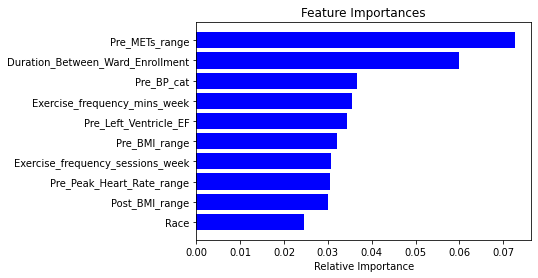

In [ ]:
#@title RFE Ranking Plot
regressor = RandomForestClassifier()
CART_model = DecisionTreeClassifier()
# fit the model
feature_importance=regressor.fit(x_pre_rfe,y_target_dummies)
# get importance
importance = regressor.feature_importances_

features = x_pre_rfe.columns
indices = np.argsort(importance)

# customized number 
num_features = 10 

plt.figure
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importance[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#@title RFE Ranking
pd.set_option('display.max_rows', 100)
pd.DataFrame(
    zip(x_pre_rfe.columns, abs(regressor.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight",ascending=False).reset_index(drop=True)

,feature,weight
0,Pre_METs_range,0.072736
1,Duration_Between_Ward_Enrollment,0.059854
2,Pre_BP_cat,0.036637
3,Exercise_frequency_mins_week,0.035455
4,Pre_Left_Ventricle_EF,0.034343
5,Pre_BMI_range,0.031991
6,Exercise_frequency_sessions_week,0.030713
7,Pre_Peak_Heart_Rate_range,0.030544
8,Post_BMI_range,0.029990
9,Race,0.024534


In [ ]:
#@title OHE FEATURES EXTRACTION 10, 15, 20
# One hot encode categorical variable, scale numeric variable, drop target variable and unwanted columns and combine. 


#10 FEATURES

transformer_rfe10 = make_column_transformer(
    (OneHotEncoder(), ['Pre_Left_Ventricle_EF','Pre_METs_range',"Pre_Peak_Heart_Rate_range","Pre_BP_cat",'CR_BP_cat','Pre_BMI_range','Post_BMI_range']),
    verbose_feature_names_out=True)
df4 = df[['Pre_Left_Ventricle_EF','Pre_METs_range',"Pre_Peak_Heart_Rate_range","Pre_BP_cat",'CR_BP_cat','Pre_BMI_range','Post_BMI_range']]
transformed_rfe10 = transformer_rfe10.fit_transform(df4)
print(transformed_rfe10.todense())
column_name_rfe10 = transformer_rfe10.get_feature_names()
transformed_df4_rfe10 = pd.DataFrame.sparse.from_spmatrix(transformed_rfe10, columns=column_name_rfe10)
transformed_df4_rfe10= transformed_df4_rfe10.astype('int')
print(transformed_df4_rfe10)

numerical_col_rfe10 = df[['Exercise_frequency_sessions_week','Exercise_frequency_mins_week',"Duration_Between_Ward_Enrollment"]]
scaler = MinMaxScaler()
scaled_data_rfe10 = scaler.fit_transform(numerical_col_rfe10)
transformed_scaled_data_rfe10 = pd.DataFrame(scaled_data_rfe10, columns=numerical_col_rfe10.columns)
transformed_scaled_data_rfe10.head()

# Concatenate categorical and numerical column into one dataset
transformed_df4_rfe10.reset_index(drop=True, inplace=True)
transformed_scaled_data_rfe10.reset_index(drop=True, inplace=True)
df_post_rfe10_1 = pd.concat([transformed_df4_rfe10, transformed_scaled_data_rfe10], axis=1)
df_post_rfe10= df_post_rfe10_1.to_numpy()

#15 FEATURES

transformer_rfe_15 = make_column_transformer(
    (OneHotEncoder(), ['Pre_Left_Ventricle_EF','Pre_METs_range',"Pre_Peak_Heart_Rate_range","Pre_BP_cat",'CR_BP_cat',
                       'Pre_BMI_range','Race','Post_BMI_range','HbA1c_cat','Patient_occupation','LDL_cat']),
    verbose_feature_names_out=True)
df6_15 = df[['Pre_Left_Ventricle_EF','Pre_METs_range',"Pre_Peak_Heart_Rate_range","Pre_BP_cat",'CR_BP_cat',
             'Pre_BMI_range','Race','Post_BMI_range','HbA1c_cat','Patient_occupation','LDL_cat']]
transformed_rfe15 = transformer_rfe_15.fit_transform(df6_15)
print(transformed_rfe15.todense())
column_name_rfe15 = transformer_rfe_15.get_feature_names()
transformed_df6_rfe15 = pd.DataFrame.sparse.from_spmatrix(transformed_rfe15, columns=column_name_rfe15)
transformed_df6_rfe15= transformed_df6_rfe15.astype('int')
print(transformed_df6_rfe15)

numerical_col_rfe15 = df[['Exercise_frequency_sessions_week','Exercise_frequency_mins_week',"Duration_Between_Ward_Enrollment",'Total_Risk_Factors']]
scaler_rfe15 = MinMaxScaler()
scaled_data_rfe15 = scaler_rfe15.fit_transform(numerical_col_rfe15)
transformed_scaled_data_rfe15 = pd.DataFrame(scaled_data_rfe15, columns=numerical_col_rfe15.columns)
transformed_scaled_data_rfe15.head()

# Concatenate categorical and numerical column into one dataset
transformed_df6_rfe15.reset_index(drop=True, inplace=True)
transformed_scaled_data_rfe15.reset_index(drop=True, inplace=True)
df_post_rfe15_1 = pd.concat([transformed_df6_rfe15, transformed_scaled_data_rfe15], axis=1)
df_post_rfe15= df_post_rfe15_1.to_numpy()
print(df_post_rfe15_1)


#20 FEATURES 

transformer_rfe_20 = make_column_transformer(
    (OneHotEncoder(), ['Pre_Left_Ventricle_EF','Pre_METs_range',"Pre_Peak_Heart_Rate_range","Pre_BP_cat",'CR_BP_cat',
                       'Pre_BMI_range','Race','Post_BMI_range','Triglyceride_cat','Post_RTW',
                       'Past_CV_Unknown','HbA1c_cat','Patient_occupation','LDL_cat','Post_Peak_Heart_Rate_range',
                       'Post_Medication_ACEI/ARB']),
    verbose_feature_names_out=True)
df5 = df[['Pre_Left_Ventricle_EF','Pre_METs_range',"Pre_Peak_Heart_Rate_range","Pre_BP_cat",'CR_BP_cat',
          'Pre_BMI_range','Race','Post_BMI_range','Triglyceride_cat','Post_RTW',
          'Past_CV_Unknown','HbA1c_cat','Patient_occupation','LDL_cat','Post_Peak_Heart_Rate_range',
          'Post_Medication_ACEI/ARB']]
transformed_rfe20 = transformer_rfe_20.fit_transform(df5)
print(transformed_rfe20.todense())
column_name_rfe20 = transformer_rfe_20.get_feature_names()
transformed_df5_rfe20 = pd.DataFrame.sparse.from_spmatrix(transformed_rfe20, columns=column_name_rfe20)
transformed_df5_rfe20= transformed_df5_rfe20.astype('int')
print(transformed_df5_rfe20)

numerical_col_rfe20 = df[['Exercise_frequency_sessions_week','Exercise_frequency_mins_week',"Duration_Between_Ward_Enrollment",'Total_Risk_Factors']]
scaler_rfe20 = MinMaxScaler()
scaled_data_rfe20 = scaler_rfe20.fit_transform(numerical_col_rfe20)
transformed_scaled_data_rfe20 = pd.DataFrame(scaled_data_rfe20, columns=numerical_col_rfe20.columns)
transformed_scaled_data_rfe20.head()

# Concatenate categorical and numerical column into one dataset
transformed_df5_rfe20.reset_index(drop=True, inplace=True)
transformed_scaled_data_rfe20.reset_index(drop=True, inplace=True)
df_post_rfe20_1 = pd.concat([transformed_df5_rfe20, transformed_scaled_data_rfe20], axis=1)
df_post_rfe20= df_post_rfe20_1.to_numpy()
print(df_post_rfe20_1)

In [ ]:
# Split data into training and testing dataset using train test split

#RFE 10 FEATURES
Xtrain_rfe10_ml, Xtest_rfe10_ml, ytrain_rfe10_ml, ytest_rfe10_ml = train_test_split(df_post_rfe10, y_target_le,random_state=123, test_size=0.2) #OHE rfe 10 , different y
Xtrain_post_rfe10, Xtest_post_rfe10, ytrain_post_rfe10, ytest_post_rfe10 = train_test_split(df_post_rfe10, transformed_y_target_le,random_state=123, test_size=0.2) #OHE rfe 10 

#RFE 15 FEATURES
Xtrain_rfe15_ml, Xtest_rfe15_ml, ytrain_rfe15_ml, ytest_rfe15_ml = train_test_split(df_post_rfe15, y_target_le,random_state=123, test_size=0.2) #OHE rfe 15 , different y
Xtrain_post_rfe15, Xtest_post_rfe15, ytrain_post_rfe15, ytest_post_rfe15 = train_test_split(df_post_rfe15, transformed_y_target_le,random_state=123, test_size=0.2) #OHE rfe 15 

#RFE 20 FEATURES
Xtrain_rfe20_ml, Xtest_rfe20_ml, ytrain_rfe20_ml, ytest_rfe20_ml = train_test_split(df_post_rfe20, y_target_le,random_state=123, test_size=0.2) #OHE rfe 20 , different y
Xtrain_post_rfe20, Xtest_post_rfe20, ytrain_post_rfe20, ytest_post_rfe20 = train_test_split(df_post_rfe20, transformed_y_target_le,random_state=123, test_size=0.2) #OHE rfe 20 

# **OHE for All Input**

In [ ]:
#@title OHE for categorical variables
# Set encoding and scaling instructions
transformer_all = make_column_transformer(
    (OneHotEncoder(), ['Race', 'Patient_occupation','Health_funding','Prescribed_Sessions','Health_funding',
                       'CR_Adherence','Pre_Tobacco','Post_Tobacco','Pre_Exercise_Stress_Test','Post_Exercise_Stress_Test',
                       'Gender','CR_Completion','Education_level','Pre_BMI_range','Post_BMI_range',
                       'Pre_Peak_Heart_Rate_range','Post_Peak_Heart_Rate_range','Pre_METs_range','Post_Peak_METs_range','Pre_Left_Ventricle_EF',
                       'Triglyceride_cat','HDL_cat','LDL_cat','HbA1c_cat','Pre_BP_cat',
                       'CR_BP_cat','Duration_CR_cat','AgeGroup']),    
                        remainder='passthrough')

df_cat_OHE = df.drop(columns=['AACVPR_Risk_Category','Duration_CR','CR_Intake','Age',"Total_Risk_Factors",
                              "Exercise_frequency_mins_week","Exercise_frequency_sessions_week","Exercise_intensity","Anxiety_Scores","Depression_Scores",
                              "Duration_Between_Ward_Enrollment",'Unexpected_Events'])
x_cat_OHE = transformer_all.fit_transform(df_cat_OHE)
transformed_x_cat_OHE = pd.DataFrame(x_cat_OHE, columns=transformer_all.get_feature_names())
transformed_x_cat_OHE= transformed_x_cat_OHE.astype('int')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.set_option('display.max_columns', 100)
df_cat_OHE

In [ ]:
#@title Min max numerical variables
df_all_num_col = df[["Total_Risk_Factors","Exercise_frequency_mins_week","Exercise_frequency_sessions_week","Exercise_intensity","Anxiety_Scores","Depression_Scores","Duration_Between_Ward_Enrollment",'Unexpected_Events']]
scaler_df_all = MinMaxScaler()
df_all_scaled_data = scaler_df_all.fit_transform(df_all_num_col)
transformed_df_all_scaled_data = pd.DataFrame(df_all_scaled_data, columns=df_all_num_col.columns)
transformed_df_all_scaled_data.head()

,Total_Risk_Factors,Exercise_frequency_mins_week,Exercise_frequency_sessions_week,Exercise_intensity,Anxiety_Scores,Depression_Scores,Duration_Between_Ward_Enrollment,Unexpected_Events
0,0.000000,0.500,0.066667,0.625,0.545455,0.307692,0.093966,0.0
1,1.000000,0.500,0.333333,0.500,0.545455,0.307692,0.095690,1.0
2,0.666667,0.250,0.466667,0.875,0.545455,0.307692,0.125862,0.0
3,1.000000,0.375,0.333333,0.500,0.545455,0.307692,0.071552,0.0
4,0.666667,0.500,0.066667,0.625,0.545455,0.307692,0.020690,0.0


In [ ]:
#@title Concatenate categorical and numerical columns
# Concatenate categorical and numerical column into one dataset
transformed_x_cat_OHE.reset_index(drop=True, inplace=True)
transformed_df_all_scaled_data.reset_index(drop=True, inplace=True)
x_all_OHE1 = pd.concat([transformed_x_cat_OHE,transformed_df_all_scaled_data], axis=1)
x_all_OHE= x_all_OHE1.to_numpy()
print(x_all_OHE1.head())

In [ ]:
# Split data into training and testing dataset using train test split
Xtrain_all_ml, Xtest_all_ml, ytrain_all_ml, ytest_all_ml= train_test_split(x_all_OHE,y_target_le,random_state=123, test_size=0.2)
Xtrain_all,Xtest_all, ytrain_all, ytest_all = train_test_split(x_all_OHE,transformed_y_target_le,random_state=1, test_size=0.2)   

# **Feature Selection (Mapping with Benchmark Paper)**

In [ ]:
#@title FS (Mapping with Benchmark Paper)
# One hot encode categorical variable, scale numeric variable, drop target variable and unwanted columns and combine. 


#5 FEATURES

transformer_fs = make_column_transformer(
    (OneHotEncoder(), ['Gender','AgeGroup',"Risk_Factors_DM Type 2",'Pre_BMI_range','Post_BMI_range']),
    verbose_feature_names_out=True)
df7 = df[['Gender','AgeGroup',"Risk_Factors_DM Type 2",'Pre_BMI_range','Post_BMI_range']]
transformed_fs = transformer_fs.fit_transform(df7)
column_name_fs = transformer_fs.get_feature_names()
transformed_df7_fs = pd.DataFrame(transformed_fs, columns=column_name_fs)
transformed_df7_fs= transformed_df7_fs.astype('int')
print(transformed_df7_fs)
df_post_fs= transformed_df7_fs.to_numpy()


In [ ]:
# Split data into training and testing dataset using train test split

#FS
Xtrain_fs_ml, Xtest_fs_ml, ytrain_fs_ml, ytest_fs_ml = train_test_split(df_post_fs, y_target_le,random_state=123, test_size=0.2) #OHE FS , different y
Xtrain_post_fs, Xtest_post_fs, ytrain_post_fs, ytest_post_fs = train_test_split(df_post_fs, transformed_y_target_le,random_state=123, test_size=0.2) #OHE FS

# **Machine Learning**

## **LASSO**

### **LASSO with dataset of all input**

In [ ]:
#@title Dataset with all input
# All input

def score_lasso_all(y_pred_all, y_true_all):
  error_all= np.square(np.log10(y_pred_all +1) - np.log10(y_true_all+1)).mean() ** 0.5
  score_lasso_all = 1 - error_all
  return score_lasso_all
actual_AACVPR_all= list(ytest_all)
actual_AACVPR_all= np.asarray(actual_AACVPR_all)

lasso_all = Lasso(alpha=0.4)
lasso_all.fit(Xtrain_all, ytrain_all)
#Predicting for X_test
y_pred_all =lasso_all.predict(Xtest_all)
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score_lasso_all(y_pred_all,actual_AACVPR_all))



Lasso SCORE :  0.8564317349702475


### **LASSO with dataset of RFE 10 features**

In [ ]:
#@title Dataset with RFE 10 features
# RFE 10 FEATURES

def score_lasso_rfe10(y_pred_rfe10, y_true_rfe10):
  error_rfe10 = np.square(np.log10(y_pred_rfe10 +1) - np.log10(y_true_rfe10 +1)).mean() ** 0.5
  score_lasso_rfe10 = 1 - error_rfe10
  return score_lasso_rfe10
actual_AACVPR_rfe10= list(ytest_post_rfe10)
actual_AACVPR_rfe10 = np.asarray(actual_AACVPR_rfe10)

# Create an instance of Lasso Regression implementation
lasso_rfe10 = Lasso(alpha=0.4) #0.04

# Fit the Lasso model

lasso_rfe10.fit(Xtrain_post_rfe10, ytrain_post_rfe10)

# Create the model score

print(lasso_rfe10.score(Xtest_post_rfe10, ytest_post_rfe10), lasso_rfe10.score(Xtrain_post_rfe10, ytrain_post_rfe10))

#Predicting for X_test
y_pred_rfe10 =lasso_rfe10.predict(Xtest_post_rfe10)
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score_lasso_rfe10(y_pred_rfe10, actual_AACVPR_rfe10))

-0.010148106774218476 -3.675034602560837e-08


Lasso SCORE :  0.8554581251999711


### **LASSO with dataset of RFE 15 features**

In [ ]:
#@title Dataset with RFE 15 features
# RFE 15 FEATURES

def score_lasso_rfe15(y_pred_rfe15, y_true_rfe15):
  error_rfe15 = np.square(np.log10(y_pred_rfe15 +1) - np.log10(y_true_rfe15 +1)).mean() ** 0.5
  score_lasso_rfe15 = 1 - error_rfe15
  return score_lasso_rfe15
actual_AACVPR_rfe15= list(ytest_post_rfe15)
actual_AACVPR_rfe15 = np.asarray(actual_AACVPR_rfe15)

# Create an instance of Lasso Regression implementation
lasso_rfe15 = Lasso(alpha=0.4) #0.04

# Fit the Lasso model

lasso_rfe15.fit(Xtrain_post_rfe15, ytrain_post_rfe15)

# Create the model score

print(lasso_rfe15.score(Xtest_post_rfe15, ytest_post_rfe15), lasso_rfe15.score(Xtrain_post_rfe15, ytrain_post_rfe15))

#Predicting for X_test
y_pred_rfe15 =lasso_rfe15.predict(Xtest_post_rfe15)
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score_lasso_rfe15(y_pred_rfe15, actual_AACVPR_rfe15))

-0.010148106774218476 -3.675034602560837e-08


Lasso SCORE :  0.8554581251999711


### **LASSO with dataset of RFE 20 features**

In [ ]:
#@title Dataset with RFE 20 features
# RFE 20 FEATURES

def score_lasso_rfe20(y_pred_rfe20, y_true_rfe20):
  error_rfe20 = np.square(np.log10(y_pred_rfe20 +1) - np.log10(y_true_rfe20 +1)).mean() ** 0.5
  score_lasso_rfe20 = 1 - error_rfe20
  return score_lasso_rfe20
actual_AACVPR_rfe20= list(ytest_post_rfe20)
actual_AACVPR_rfe20 = np.asarray(actual_AACVPR_rfe20)

# Create an instance of Lasso Regression implementation
lasso_rfe20 = Lasso(alpha=0.4) #0.04

# Fit the Lasso model

lasso_rfe20.fit(Xtrain_post_rfe20, ytrain_post_rfe20)

# Create the model score

print(lasso_rfe20.score(Xtest_post_rfe20, ytest_post_rfe20), lasso_rfe20.score(Xtrain_post_rfe20, ytrain_post_rfe20))

#Predicting for X_test
y_pred_rfe20 =lasso_rfe20.predict(Xtest_post_rfe20)
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score_lasso_rfe20(y_pred_rfe20, actual_AACVPR_rfe20))

-0.010148106774218476 -3.675034602560837e-08


Lasso SCORE :  0.8554581251999711


### **LASSO with dataset of benchmark FS**

In [ ]:
#@title Dataset FS (Mapping with Benchmark Paper) 
# RFE 20 FEATURES

def score_lasso_fs(y_pred_fs, y_true_fs):
  error_fs = np.square(np.log10(y_pred_fs +1) - np.log10(y_true_fs +1)).mean() ** 0.5
  score_lasso_fs = 1 - error_fs
  return score_lasso_fs
actual_AACVPR_fs= list(ytest_post_fs)
actual_AACVPR_fs = np.asarray(actual_AACVPR_fs)

# Create an instance of Lasso Regression implementation
lasso_fs = Lasso(alpha=0.4) #0.04

# Fit the Lasso model

lasso_fs.fit(Xtrain_post_fs, ytrain_post_fs)

# Create the model score

print(lasso_fs.score(Xtest_post_fs, ytest_post_fs), lasso_fs.score(Xtrain_post_fs, ytrain_post_fs))

#Predicting for X_test
y_pred_fs =lasso_fs.predict(Xtest_post_fs)
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score_lasso_fs(y_pred_fs, actual_AACVPR_fs))

-0.010148106774218476 -3.675034602560837e-08


Lasso SCORE :  0.8554581251999711


## **Decision tree**

In [ ]:
#@title Dataset with all inputs
#All input

model_dt_all= DecisionTreeClassifier()
model_dt_all.fit(Xtrain_all_ml,ytrain_all_ml)
y_pred_dt_all=model_dt_all.predict(Xtest_all_ml)
print(accuracy_score(ytest_all_ml,y_pred_dt_all))
print(classification_report(ytest_all_ml,y_pred_dt_all))

0.37142857142857144
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.33      0.31      0.32        13
           2       0.30      0.27      0.29        11

    accuracy                           0.37        35
   macro avg       0.36      0.38      0.37        35
weighted avg       0.36      0.37      0.37        35



In [ ]:
#@title Dataset with RFE 10 features
#RFE 10 FEATURES

model_dt10= DecisionTreeClassifier()
model_dt10.fit(Xtrain_rfe10_ml,ytrain_rfe10_ml)
y_pred_dt10=model_dt10.predict(Xtest_rfe10_ml)
print(accuracy_score(ytest_rfe10_ml,y_pred_dt10))
print(classification_report(ytest_rfe10_ml,y_pred_dt10))

0.45714285714285713
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.42      0.38      0.40        13
           2       0.44      0.36      0.40        11

    accuracy                           0.46        35
   macro avg       0.45      0.46      0.45        35
weighted avg       0.45      0.46      0.45        35



In [ ]:
#@title Dataset with RFE 15 features
#RFE 15 FEATURES

model_dt15= DecisionTreeClassifier()
model_dt15.fit(Xtrain_rfe15_ml,ytrain_rfe15_ml)
y_pred_dt15=model_dt15.predict(Xtest_rfe15_ml)
print(accuracy_score(ytest_rfe15_ml,y_pred_dt15))
print(classification_report(ytest_rfe15_ml,y_pred_dt15))

0.37142857142857144
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.31      0.31      0.31        13
           2       0.33      0.27      0.30        11

    accuracy                           0.37        35
   macro avg       0.37      0.38      0.37        35
weighted avg       0.36      0.37      0.37        35



In [ ]:
#@title Dataset with RFE 20 features
#RFE 20 FEATURES

model_dt20= DecisionTreeClassifier()
model_dt20.fit(Xtrain_rfe20_ml,ytrain_rfe20_ml)
y_pred_dt20=model_dt20.predict(Xtest_rfe20_ml)
print(accuracy_score(ytest_rfe20_ml,y_pred_dt20))
print(classification_report(ytest_rfe20_ml,y_pred_dt20))

0.4
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.38      0.38      0.38        13
           2       0.27      0.27      0.27        11

    accuracy                           0.40        35
   macro avg       0.40      0.40      0.40        35
weighted avg       0.40      0.40      0.40        35



In [ ]:
#@title Dataset FS (Mapping with Benchmark Paper)
#Benchmark FS

model_dt_fs= DecisionTreeClassifier()
model_dt_fs.fit(Xtrain_fs_ml, ytrain_fs_ml)
y_pred_dt_fs=model_dt_fs.predict(Xtest_fs_ml)
print(accuracy_score(ytest_fs_ml ,y_pred_dt_fs))
print(classification_report(ytest_fs_ml ,y_pred_dt_fs))

0.5142857142857142
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.80      0.31      0.44        13
           2       0.47      0.73      0.57        11

    accuracy                           0.51        35
   macro avg       0.58      0.53      0.51        35
weighted avg       0.59      0.51      0.50        35



## **SVC**

In [ ]:
#@title Dataset with all input
#All inputs

model_SVC_all= SVC()
model_SVC_all.fit(Xtrain_all_ml,ytrain_all_ml)
y_pred_svc_all=model_SVC_all.predict(Xtest_all_ml)
print(accuracy_score(ytest_all_ml,y_pred_svc_all))
print(classification_report(ytest_all_ml,y_pred_svc_all))


0.37142857142857144
              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.29      0.31      0.30        13
           2       0.38      0.55      0.44        11

    accuracy                           0.37        35
   macro avg       0.42      0.38      0.37        35
weighted avg       0.41      0.37      0.37        35



In [ ]:
#@title Dataset with RFE 10 features
#RFE 10

model_SVC10= SVC()
model_SVC10.fit(Xtrain_rfe10_ml,ytrain_rfe10_ml)
y_pred_svc10=model_SVC10.predict(Xtest_rfe10_ml)
print(accuracy_score(ytest_rfe10_ml,y_pred_svc10))
print(classification_report(ytest_rfe10_ml,y_pred_svc10))

0.34285714285714286
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        11
           1       0.27      0.23      0.25        13
           2       0.33      0.27      0.30        11

    accuracy                           0.34        35
   macro avg       0.34      0.35      0.34        35
weighted avg       0.33      0.34      0.33        35



In [ ]:
#@title Dataset with RFE 15 features
#RFE 15

model_SVC15= SVC()
model_SVC15.fit(Xtrain_rfe15_ml,ytrain_rfe15_ml)
y_pred_svc15=model_SVC15.predict(Xtest_rfe15_ml)
print(accuracy_score(ytest_rfe15_ml,y_pred_svc15))
print(classification_report(ytest_rfe15_ml,y_pred_svc15))

0.34285714285714286
              precision    recall  f1-score   support

           0       0.38      0.45      0.42        11
           1       0.18      0.15      0.17        13
           2       0.45      0.45      0.45        11

    accuracy                           0.34        35
   macro avg       0.34      0.35      0.35        35
weighted avg       0.33      0.34      0.34        35



In [ ]:
#@title Dataset with RFE 20 features
#RFE 20

model_SVC20= SVC()
model_SVC20.fit(Xtrain_rfe20_ml,ytrain_rfe20_ml)
y_pred_svc20=model_SVC20.predict(Xtest_rfe20_ml)
print(accuracy_score(ytest_rfe20_ml,y_pred_svc20))
print(classification_report(ytest_rfe20_ml,y_pred_svc20))

0.45714285714285713
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.30      0.23      0.26        13
           2       0.54      0.64      0.58        11

    accuracy                           0.46        35
   macro avg       0.45      0.47      0.46        35
weighted avg       0.44      0.46      0.44        35



In [ ]:
#@title Dataset FS (Mapping with Benchmark Paper)
#Benchmark FS

model_SVC_fs= SVC()
model_SVC_fs.fit(Xtrain_fs_ml, ytrain_fs_ml)
y_pred_svc_fs=model_SVC_fs.predict(Xtest_fs_ml)
print(accuracy_score(ytest_fs_ml,y_pred_svc_fs))
print(classification_report(ytest_fs_ml,y_pred_svc_fs))

0.42857142857142855
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       0.39      0.54      0.45        13
           2       0.50      0.36      0.42        11

    accuracy                           0.43        35
   macro avg       0.44      0.42      0.42        35
weighted avg       0.44      0.43      0.43        35



## **Bagging Classifier with DT**

In [ ]:
#@title Dataset with all input
#All input

model_bagging_all= BaggingClassifier(base_estimator=DecisionTreeClassifier())
model_bagging_all.fit(Xtrain_all_ml,ytrain_all_ml)
y_pred_bagging_all=model_bagging_all.predict(Xtest_all_ml)
print(accuracy_score(ytest_all_ml,y_pred_bagging_all))
print(classification_report(ytest_all_ml,y_pred_bagging_all))

0.45714285714285713
              precision    recall  f1-score   support

           0       0.44      0.64      0.52        11
           1       0.57      0.31      0.40        13
           2       0.42      0.45      0.43        11

    accuracy                           0.46        35
   macro avg       0.48      0.47      0.45        35
weighted avg       0.48      0.46      0.45        35



In [ ]:
#@title Dataset with RFE 10 features
#RFE 10
model_bagging10= BaggingClassifier(base_estimator=DecisionTreeClassifier())
model_bagging10.fit(Xtrain_rfe10_ml, ytrain_rfe10_ml)
y_pred_bagging10=model_bagging10.predict(Xtest_rfe10_ml)
print(accuracy_score(ytest_rfe10_ml,y_pred_bagging10))
print(classification_report(ytest_rfe10_ml ,y_pred_bagging10))

0.4857142857142857
              precision    recall  f1-score   support

           0       0.47      0.73      0.57        11
           1       0.45      0.38      0.42        13
           2       0.57      0.36      0.44        11

    accuracy                           0.49        35
   macro avg       0.50      0.49      0.48        35
weighted avg       0.50      0.49      0.47        35



In [ ]:
#@title Dataset with RFE 15 features
#RFE 15
model_bagging15= BaggingClassifier(base_estimator=DecisionTreeClassifier())
model_bagging15.fit(Xtrain_rfe15_ml, ytrain_rfe15_ml)
y_pred_bagging15=model_bagging15.predict(Xtest_rfe15_ml)
print(accuracy_score(ytest_rfe15_ml,y_pred_bagging15))
print(classification_report(ytest_rfe15_ml,y_pred_bagging15))

0.34285714285714286
              precision    recall  f1-score   support

           0       0.42      0.45      0.43        11
           1       0.33      0.23      0.27        13
           2       0.29      0.36      0.32        11

    accuracy                           0.34        35
   macro avg       0.35      0.35      0.34        35
weighted avg       0.34      0.34      0.34        35



In [ ]:
#@title Dataset with RFE 20 features
#RFE 20
model_bagging20= BaggingClassifier(base_estimator=DecisionTreeClassifier())
model_bagging20.fit(Xtrain_rfe20_ml,ytrain_rfe20_ml)
y_pred_bagging20=model_bagging20.predict(Xtest_rfe20_ml)
print(accuracy_score(ytest_rfe20_ml,y_pred_bagging20))
print(classification_report(ytest_rfe20_ml,y_pred_bagging20))

0.42857142857142855
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.40      0.31      0.35        13
           2       0.36      0.36      0.36        11

    accuracy                           0.43        35
   macro avg       0.42      0.44      0.42        35
weighted avg       0.42      0.43      0.42        35



In [ ]:
#@title Dataset FS (Mapping with Benchmark Paper)
#Benchmark FS

model_bagging_fs= BaggingClassifier(base_estimator=DecisionTreeClassifier())
model_bagging_fs.fit(Xtrain_fs_ml, ytrain_fs_ml)
y_pred_bagging_fs=model_bagging_fs.predict(Xtest_fs_ml)
print(accuracy_score(ytest_fs_ml ,y_pred_bagging_fs))
print(classification_report(ytest_fs_ml ,y_pred_bagging_fs))

0.45714285714285713
              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.44      0.62      0.52        13
           2       0.42      0.45      0.43        11

    accuracy                           0.46        35
   macro avg       0.49      0.45      0.44        35
weighted avg       0.48      0.46      0.45        35



## **Random Forest**

In [ ]:
#@title Dataset with all input
#All input
model_rf_all=RandomForestClassifier(criterion = 'entropy')
model_rf_all.fit(Xtrain_all_ml,ytrain_all_ml)
y_pred_rf_all=model_rf_all.predict(Xtest_all_ml)
print(accuracy_score(ytest_all_ml,y_pred_rf_all))
print(classification_report(ytest_all_ml,y_pred_rf_all))

0.45714285714285713
              precision    recall  f1-score   support

           0       0.43      0.55      0.48        11
           1       0.67      0.15      0.25        13
           2       0.44      0.73      0.55        11

    accuracy                           0.46        35
   macro avg       0.51      0.48      0.43        35
weighted avg       0.52      0.46      0.42        35



In [ ]:
#@title Dataset with RFE 10 features
#RFE 10 FEATURES

model_rf10=RandomForestClassifier(criterion = 'entropy')
model_rf10.fit(Xtrain_rfe10_ml, ytrain_rfe10_ml)
y_pred_rf10=model_rf10.predict(Xtest_rfe10_ml)
print(accuracy_score(ytest_rfe10_ml ,y_pred_rf10))
print(classification_report(ytest_rfe10_ml ,y_pred_rf10))

0.4
              precision    recall  f1-score   support

           0       0.47      0.64      0.54        11
           1       0.30      0.23      0.26        13
           2       0.40      0.36      0.38        11

    accuracy                           0.40        35
   macro avg       0.39      0.41      0.39        35
weighted avg       0.38      0.40      0.39        35



In [ ]:
#@title Dataset with RFE 15 features
#RFE 15 FEATURES

model_rf15=RandomForestClassifier(criterion = 'entropy')
model_rf15.fit(Xtrain_rfe15_ml, ytrain_rfe15_ml)
y_pred_rf15=model_rf15.predict(Xtest_rfe15_ml)
print(accuracy_score(ytest_rfe15_ml,y_pred_rf15))
print(classification_report(ytest_rfe15_ml,y_pred_rf15))

0.37142857142857144
              precision    recall  f1-score   support

           0       0.36      0.45      0.40        11
           1       0.30      0.23      0.26        13
           2       0.45      0.45      0.45        11

    accuracy                           0.37        35
   macro avg       0.37      0.38      0.37        35
weighted avg       0.37      0.37      0.37        35



In [ ]:
#@title Dataset with RFE 20 features
#RFE 20 FEATURES

model_rf20=RandomForestClassifier(criterion = 'entropy')
model_rf20.fit(Xtrain_rfe20_ml,ytrain_rfe20_ml)
y_pred_rf20=model_rf20.predict(Xtest_rfe20_ml)
print(accuracy_score(ytest_rfe20_ml,y_pred_rf20))
print(classification_report(ytest_rfe20_ml,y_pred_rf20))

0.37142857142857144
              precision    recall  f1-score   support

           0       0.36      0.45      0.40        11
           1       0.38      0.23      0.29        13
           2       0.38      0.45      0.42        11

    accuracy                           0.37        35
   macro avg       0.37      0.38      0.37        35
weighted avg       0.37      0.37      0.36        35



In [ ]:
#@title Dataset FS (Mapping with Benchmark Paper)
#Benchmark FS

model_rf_fs=RandomForestClassifier(criterion = 'entropy')
model_rf_fs.fit(Xtrain_fs_ml, ytrain_fs_ml)
y_pred_rf_fs=model_rf_fs.predict(Xtest_fs_ml)
print(accuracy_score(ytest_fs_ml ,y_pred_rf_fs))
print(classification_report(ytest_fs_ml ,y_pred_rf_fs))

0.4857142857142857
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       0.50      0.31      0.38        13
           2       0.50      0.82      0.62        11

    accuracy                           0.49        35
   macro avg       0.48      0.50      0.47        35
weighted avg       0.48      0.49      0.46        35



## **Gaussian NB**

In [ ]:
#@title Dataset with all input
#All input

model_NB_all = GaussianNB()
model_NB_all.fit(Xtrain_all_ml,ytrain_all_ml)
y_pred_NB_all=model_NB_all.predict(Xtest_all_ml)
print(accuracy_score(ytest_all_ml,y_pred_NB_all))

0.3142857142857143


In [ ]:
#@title Dataset with RFE 10 features
#RFE 10 FEATURES

model_NB10 = GaussianNB()
model_NB10.fit(Xtrain_rfe10_ml, ytrain_rfe10_ml)
y_pred_NB10=model_NB10.predict(Xtest_rfe10_ml)
print(accuracy_score(ytest_rfe10_ml ,y_pred_NB10))

0.4


In [ ]:
#@title Dataset with RFE 15 features
#RFE 15 FEATURES

model_NB15 = GaussianNB()
model_NB15.fit(Xtrain_rfe15_ml, ytrain_rfe15_ml)
y_pred_NB15=model_NB15.predict(Xtest_rfe15_ml)
print(accuracy_score(ytest_rfe15_ml ,y_pred_NB15))

0.37142857142857144


In [ ]:
#@title Dataset with RFE 20 features
#RFE 20 FEATURES

model_NB20 = GaussianNB()
model_NB20.fit(Xtrain_rfe20_ml,ytrain_rfe20_ml)
y_pred_NB20=model_NB20.predict(Xtest_rfe20_ml)
print(accuracy_score(ytest_rfe20_ml ,y_pred_NB20))

0.4


In [ ]:
#@title Dataset FS (Mapping with Benchmark Paper)
#Benchmark FS

model_NB_fs= GaussianNB()
model_NB_fs.fit(Xtrain_fs_ml, ytrain_fs_ml)
y_pred_NB_fs=model_NB_fs.predict(Xtest_fs_ml)
print(accuracy_score(ytest_fs_ml,y_pred_NB_fs))

0.37142857142857144


## **AdaBoost Classifier**

In [ ]:
#@title Dataset with all input
#All input

model_ada_all= AdaBoostClassifier(learning_rate=0.01)
model_ada_all.fit(Xtrain_all_ml,ytrain_all_ml)
y_pred_ada_all=model_ada_all.predict(Xtest_all_ml)
print(accuracy_score(ytest_all_ml,y_pred_ada_all))
print(classification_report(ytest_all_ml,y_pred_ada_all))

0.4857142857142857
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.00      0.00      0.00        13
           2       0.48      0.91      0.62        11

    accuracy                           0.49        35
   macro avg       0.33      0.52      0.40        35
weighted avg       0.31      0.49      0.37        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#@title Dataset with RFE 10 features
#RFE 10 FEATURES

model_ada10= AdaBoostClassifier(learning_rate=0.01)
model_ada10.fit(Xtrain_rfe10_ml, ytrain_rfe10_ml)
y_pred_ada10=model_ada10.predict(Xtest_rfe10_ml)
print(accuracy_score(ytest_rfe10_ml ,y_pred_ada10))
print(classification_report(ytest_rfe10_ml ,y_pred_ada10))

0.4857142857142857
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.00      0.00      0.00        13
           2       0.48      0.91      0.62        11

    accuracy                           0.49        35
   macro avg       0.33      0.52      0.40        35
weighted avg       0.31      0.49      0.37        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#@title Dataset with RFE 15 features
#RFE 15 FEATURES

model_ada15= AdaBoostClassifier(learning_rate=0.01)
model_ada15.fit(Xtrain_rfe15_ml, ytrain_rfe15_ml)
y_pred_ada15=model_ada15.predict(Xtest_rfe15_ml)
print(accuracy_score(ytest_rfe15_ml,y_pred_ada15))
print(classification_report(ytest_rfe15_ml,y_pred_ada15))

0.4857142857142857
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.00      0.00      0.00        13
           2       0.48      0.91      0.62        11

    accuracy                           0.49        35
   macro avg       0.33      0.52      0.40        35
weighted avg       0.31      0.49      0.37        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#@title Dataset with RFE 20 features
#RFE 20 FEATURES

model_ada20= AdaBoostClassifier(learning_rate=0.01)
model_ada20.fit(Xtrain_rfe20_ml,ytrain_rfe20_ml)
y_pred_ada20=model_ada20.predict(Xtest_rfe20_ml)
print(accuracy_score(ytest_rfe20_ml,y_pred_ada20))
print(classification_report(ytest_rfe20_ml,y_pred_ada20))

0.4857142857142857
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.00      0.00      0.00        13
           2       0.48      0.91      0.62        11

    accuracy                           0.49        35
   macro avg       0.33      0.52      0.40        35
weighted avg       0.31      0.49      0.37        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#@title Dataset FS (Mapping with Benchmark Paper)
#Benchmark FS

model_ada_fs= AdaBoostClassifier(learning_rate=0.01)
model_ada_fs.fit(Xtrain_fs_ml, ytrain_fs_ml)
y_pred_ada_fs=model_ada_fs.predict(Xtest_fs_ml)
print(accuracy_score(ytest_fs_ml,y_pred_ada_fs))
print(classification_report(ytest_fs_ml,y_pred_ada_fs))

0.37142857142857144
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.42      0.62      0.50        13
           2       0.31      0.45      0.37        11

    accuracy                           0.37        35
   macro avg       0.24      0.36      0.29        35
weighted avg       0.25      0.37      0.30        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Deep Learning**

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=10)
reduce_lr1 = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10)

## **MLP**

### **MLP with dataset of all inputs**

In [ ]:
print(Xtrain_all.shape)
print(ytrain_all.shape)

(138, 142)
(138, 3)


In [ ]:
# define MLP model [16 x number of hidden units]
def MLP_model_all():

  model_all = Sequential()
  model_all.add(Flatten())

  model_all.add(Dense(142, activation='relu')) 
  model_all.add(Dropout(0.5))

  model_all.add(Dense(2272, activation='relu'))
  model_all.add(Dropout(0.5))

  model_all.add(Dense(2272, activation='relu'))
  model_all.add(Dropout(0.5))

  model_all.add(Dense(2272, activation='relu'))
  model_all.add(Dropout(0.5))

  model_all.add(Dense(3, activation='softmax'))

  # Compile model
  model_all.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model_all

In [ ]:
# Model Fitting using KerasClassifier
MLP_all = KerasClassifier(build_fn=MLP_model_all, epochs=100, verbose=2, callbacks=[early_stopping, reduce_lr1])

# Model Evaluation using k-fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True)

results_all= cross_val_score(MLP_all,Xtrain_all, ytrain_all, cv=kfold)
print("MLP all: %.2f%% (%.2f%%)" % (results_all.mean()*100, results_all.std()*100))

<ipython-input-215-6b3626ca7363>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  MLP_all = KerasClassifier(build_fn=MLP_model_all, epochs=100, verbose=2, callbacks=[early_stopping, reduce_lr1])


Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.1379 - accuracy: 0.3145 - lr: 0.0010 - 982ms/epoch - 246ms/step
Epoch 2/100
4/4 - 1s - loss: 1.3962 - accuracy: 0.3710 - lr: 0.0010 - 540ms/epoch - 135ms/step
Epoch 3/100
4/4 - 1s - loss: 1.2848 - accuracy: 0.4516 - lr: 0.0010 - 579ms/epoch - 145ms/step
Epoch 4/100
4/4 - 1s - loss: 1.2421 - accuracy: 0.4274 - lr: 0.0010 - 558ms/epoch - 140ms/step
Epoch 5/100
4/4 - 1s - loss: 1.0887 - accuracy: 0.4435 - lr: 0.0010 - 531ms/epoch - 133ms/step
Epoch 6/100
4/4 - 1s - loss: 1.0026 - accuracy: 0.5081 - lr: 0.0010 - 553ms/epoch - 138ms/step
Epoch 7/100
4/4 - 1s - loss: 0.8642 - accuracy: 0.5968 - lr: 0.0010 - 524ms/epoch - 131ms/step
Epoch 8/100
4/4 - 1s - loss: 0.8396 - accuracy: 0.6613 - lr: 0.0010 - 550ms/epoch - 138ms/step
Epoch 9/100
4/4 - 1s - loss: 0.7036 - accuracy: 0.6694 - lr: 0.0010 - 563ms/epoch - 141ms/step
Epoch 10/100
4/4 - 1s - loss: 0.7444 - accuracy: 0.6613 - lr: 0.0010 - 543ms/epoch - 136ms/step
Epoch 11/100
4/4 - 1s - loss: 0.5727 - accuracy: 0.7258 - lr:

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.2348 - accuracy: 0.3790 - lr: 0.0010 - 771ms/epoch - 193ms/step
Epoch 2/100
4/4 - 1s - loss: 1.3880 - accuracy: 0.3468 - lr: 0.0010 - 651ms/epoch - 163ms/step
Epoch 3/100
4/4 - 1s - loss: 1.1710 - accuracy: 0.3952 - lr: 0.0010 - 709ms/epoch - 177ms/step
Epoch 4/100
4/4 - 1s - loss: 1.0624 - accuracy: 0.4435 - lr: 0.0010 - 682ms/epoch - 170ms/step
Epoch 5/100
4/4 - 1s - loss: 0.9850 - accuracy: 0.5000 - lr: 0.0010 - 619ms/epoch - 155ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9552 - accuracy: 0.5000 - lr: 0.0010 - 441ms/epoch - 110ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8852 - accuracy: 0.5968 - lr: 0.0010 - 442ms/epoch - 110ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8638 - accuracy: 0.6210 - lr: 0.0010 - 445ms/epoch - 111ms/step
Epoch 9/100
4/4 - 0s - loss: 0.6932 - accuracy: 0.7016 - lr: 0.0010 - 429ms/epoch - 107ms/step
Epoch 10/100
4/4 - 0s - loss: 0.5689 - accuracy: 0.7823 - lr: 0.0010 - 429ms/epoch - 107ms/step
Epoch 11/100
4/4 - 0s - loss: 0.5748 - accuracy: 0.7339 - lr:

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.2817 - accuracy: 0.3387 - lr: 0.0010 - 963ms/epoch - 241ms/step
Epoch 2/100
4/4 - 1s - loss: 1.1765 - accuracy: 0.3226 - lr: 0.0010 - 679ms/epoch - 170ms/step
Epoch 3/100
4/4 - 1s - loss: 1.1309 - accuracy: 0.4274 - lr: 0.0010 - 682ms/epoch - 170ms/step
Epoch 4/100
4/4 - 1s - loss: 1.0742 - accuracy: 0.4758 - lr: 0.0010 - 575ms/epoch - 144ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0494 - accuracy: 0.4516 - lr: 0.0010 - 432ms/epoch - 108ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9241 - accuracy: 0.5887 - lr: 0.0010 - 445ms/epoch - 111ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8456 - accuracy: 0.6048 - lr: 0.0010 - 444ms/epoch - 111ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7386 - accuracy: 0.6935 - lr: 0.0010 - 433ms/epoch - 108ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7105 - accuracy: 0.7097 - lr: 0.0010 - 446ms/epoch - 111ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7790 - accuracy: 0.6371 - lr: 0.0010 - 439ms/epoch - 110ms/step
Epoch 11/100
4/4 - 0s - loss: 0.5710 - accuracy: 0.7742 - lr:

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.2499 - accuracy: 0.3548 - lr: 0.0010 - 776ms/epoch - 194ms/step
Epoch 2/100
4/4 - 1s - loss: 1.1811 - accuracy: 0.3952 - lr: 0.0010 - 624ms/epoch - 156ms/step
Epoch 3/100
4/4 - 1s - loss: 1.1021 - accuracy: 0.4194 - lr: 0.0010 - 689ms/epoch - 172ms/step
Epoch 4/100
4/4 - 1s - loss: 1.0852 - accuracy: 0.4758 - lr: 0.0010 - 686ms/epoch - 171ms/step
Epoch 5/100
4/4 - 1s - loss: 0.9200 - accuracy: 0.6129 - lr: 0.0010 - 668ms/epoch - 167ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9324 - accuracy: 0.5000 - lr: 0.0010 - 456ms/epoch - 114ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8463 - accuracy: 0.6210 - lr: 0.0010 - 433ms/epoch - 108ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7692 - accuracy: 0.6290 - lr: 0.0010 - 427ms/epoch - 107ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7637 - accuracy: 0.7258 - lr: 0.0010 - 458ms/epoch - 114ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6483 - accuracy: 0.6935 - lr: 0.0010 - 437ms/epoch - 109ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6490 - accuracy: 0.7419 - lr:

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.3395 - accuracy: 0.2984 - lr: 0.0010 - 660ms/epoch - 165ms/step
Epoch 2/100
4/4 - 0s - loss: 1.3294 - accuracy: 0.2500 - lr: 0.0010 - 455ms/epoch - 114ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1200 - accuracy: 0.3952 - lr: 0.0010 - 437ms/epoch - 109ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0928 - accuracy: 0.4032 - lr: 0.0010 - 455ms/epoch - 114ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0275 - accuracy: 0.4919 - lr: 0.0010 - 434ms/epoch - 109ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8960 - accuracy: 0.6210 - lr: 0.0010 - 459ms/epoch - 115ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8283 - accuracy: 0.6371 - lr: 0.0010 - 444ms/epoch - 111ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7476 - accuracy: 0.6855 - lr: 0.0010 - 439ms/epoch - 110ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7291 - accuracy: 0.7177 - lr: 0.0010 - 466ms/epoch - 117ms/step
Epoch 10/100
4/4 - 0s - loss: 0.5912 - accuracy: 0.7339 - lr: 0.0010 - 434ms/epoch - 109ms/step
Epoch 11/100
4/4 - 0s - loss: 0.5272 - accuracy: 0.8226 - lr:

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.3050 - accuracy: 0.3226 - lr: 0.0010 - 667ms/epoch - 167ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1767 - accuracy: 0.4113 - lr: 0.0010 - 442ms/epoch - 110ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1086 - accuracy: 0.4677 - lr: 0.0010 - 441ms/epoch - 110ms/step
Epoch 4/100
4/4 - 1s - loss: 1.1271 - accuracy: 0.4113 - lr: 0.0010 - 643ms/epoch - 161ms/step
Epoch 5/100
4/4 - 1s - loss: 1.0235 - accuracy: 0.5081 - lr: 0.0010 - 673ms/epoch - 168ms/step
Epoch 6/100
4/4 - 1s - loss: 0.9756 - accuracy: 0.5081 - lr: 0.0010 - 681ms/epoch - 170ms/step
Epoch 7/100
4/4 - 1s - loss: 0.8823 - accuracy: 0.6290 - lr: 0.0010 - 685ms/epoch - 171ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7301 - accuracy: 0.6855 - lr: 0.0010 - 421ms/epoch - 105ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7051 - accuracy: 0.7339 - lr: 0.0010 - 449ms/epoch - 112ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6523 - accuracy: 0.7177 - lr: 0.0010 - 437ms/epoch - 109ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6236 - accuracy: 0.7258 - lr:

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.3244 - accuracy: 0.2903 - lr: 0.0010 - 673ms/epoch - 168ms/step
Epoch 2/100
4/4 - 0s - loss: 1.3774 - accuracy: 0.3065 - lr: 0.0010 - 429ms/epoch - 107ms/step
Epoch 3/100
4/4 - 0s - loss: 1.2110 - accuracy: 0.3790 - lr: 0.0010 - 434ms/epoch - 109ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0937 - accuracy: 0.4758 - lr: 0.0010 - 446ms/epoch - 111ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0699 - accuracy: 0.4355 - lr: 0.0010 - 440ms/epoch - 110ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9610 - accuracy: 0.5484 - lr: 0.0010 - 449ms/epoch - 112ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9248 - accuracy: 0.5645 - lr: 0.0010 - 431ms/epoch - 108ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7365 - accuracy: 0.7016 - lr: 0.0010 - 450ms/epoch - 112ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7089 - accuracy: 0.7097 - lr: 0.0010 - 429ms/epoch - 107ms/step
Epoch 10/100
4/4 - 0s - loss: 0.5890 - accuracy: 0.7984 - lr: 0.0010 - 436ms/epoch - 109ms/step
Epoch 11/100
4/4 - 0s - loss: 0.5623 - accuracy: 0.7500 - lr:

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.3474 - accuracy: 0.3226 - lr: 0.0010 - 1s/epoch - 282ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1294 - accuracy: 0.3548 - lr: 0.0010 - 440ms/epoch - 110ms/step
Epoch 3/100
4/4 - 0s - loss: 1.2384 - accuracy: 0.4516 - lr: 0.0010 - 442ms/epoch - 111ms/step
Epoch 4/100
4/4 - 0s - loss: 1.1595 - accuracy: 0.4274 - lr: 0.0010 - 451ms/epoch - 113ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0473 - accuracy: 0.4677 - lr: 0.0010 - 442ms/epoch - 111ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9711 - accuracy: 0.5000 - lr: 0.0010 - 455ms/epoch - 114ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8270 - accuracy: 0.6210 - lr: 0.0010 - 436ms/epoch - 109ms/step
Epoch 8/100
4/4 - 1s - loss: 0.7833 - accuracy: 0.7097 - lr: 0.0010 - 540ms/epoch - 135ms/step
Epoch 9/100
4/4 - 1s - loss: 0.7233 - accuracy: 0.7016 - lr: 0.0010 - 703ms/epoch - 176ms/step
Epoch 10/100
4/4 - 1s - loss: 0.6874 - accuracy: 0.6613 - lr: 0.0010 - 692ms/epoch - 173ms/step
Epoch 11/100
4/4 - 1s - loss: 0.5665 - accuracy: 0.7258 - lr: 0.

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.2253 - accuracy: 0.3200 - lr: 0.0010 - 681ms/epoch - 170ms/step
Epoch 2/100
4/4 - 0s - loss: 1.4155 - accuracy: 0.3600 - lr: 0.0010 - 437ms/epoch - 109ms/step
Epoch 3/100
4/4 - 0s - loss: 1.2683 - accuracy: 0.3840 - lr: 0.0010 - 442ms/epoch - 111ms/step
Epoch 4/100
4/4 - 0s - loss: 1.1606 - accuracy: 0.3840 - lr: 0.0010 - 431ms/epoch - 108ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0338 - accuracy: 0.4720 - lr: 0.0010 - 434ms/epoch - 109ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9609 - accuracy: 0.4720 - lr: 0.0010 - 445ms/epoch - 111ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9019 - accuracy: 0.5200 - lr: 0.0010 - 436ms/epoch - 109ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7702 - accuracy: 0.6640 - lr: 0.0010 - 430ms/epoch - 108ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7780 - accuracy: 0.6080 - lr: 0.0010 - 444ms/epoch - 111ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7282 - accuracy: 0.6720 - lr: 0.0010 - 435ms/epoch - 109ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6460 - accuracy: 0.6800 - lr:

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.1239 - accuracy: 0.4080 - lr: 0.0010 - 1s/epoch - 255ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1491 - accuracy: 0.3920 - lr: 0.0010 - 486ms/epoch - 121ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1965 - accuracy: 0.3600 - lr: 0.0010 - 443ms/epoch - 111ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0076 - accuracy: 0.4800 - lr: 0.0010 - 445ms/epoch - 111ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9949 - accuracy: 0.5120 - lr: 0.0010 - 446ms/epoch - 112ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9816 - accuracy: 0.5280 - lr: 0.0010 - 459ms/epoch - 115ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9224 - accuracy: 0.5440 - lr: 0.0010 - 428ms/epoch - 107ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7354 - accuracy: 0.6800 - lr: 0.0010 - 440ms/epoch - 110ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7458 - accuracy: 0.6960 - lr: 0.0010 - 440ms/epoch - 110ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6854 - accuracy: 0.6560 - lr: 0.0010 - 443ms/epoch - 111ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6478 - accuracy: 0.6880 - lr: 0.

### **MLP with dataset of RFE 10 features**

In [ ]:
print(Xtrain_post_rfe10.shape)
print(ytrain_post_rfe10.shape)

(138, 34)
(138, 3)


In [ ]:
# define MLP model [36 x number of hidden units]
def MLP_model_rfe10():

  model_rfe10 = Sequential()
  model_rfe10.add(Flatten())

  model_rfe10.add(Dense(34, activation='relu')) 
  model_rfe10.add(Dropout(0.5))

  model_rfe10.add(Dense(1224, activation='relu'))
  model_rfe10.add(Dropout(0.5))

  model_rfe10.add(Dense(1224, activation='relu'))
  model_rfe10.add(Dropout(0.5))

  model_rfe10.add(Dense(1224, activation='relu'))
  model_rfe10.add(Dropout(0.5))

  model_rfe10.add(Dense(3, activation='softmax'))

  # Compile model
  model_rfe10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model_rfe10

In [ ]:
# Model Fitting using KerasClassifier
MLP_rfe10 = KerasClassifier(build_fn=MLP_model_rfe10, epochs=100, verbose=2, callbacks=[early_stopping, reduce_lr1])

# Model Evaluation using k-fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True)

results_rfe10 = cross_val_score(MLP_rfe10 , Xtrain_post_rfe10, ytrain_post_rfe10, cv=kfold)
print("MLP rfe10: %.2f%% (%.2f%%)" % (results_rfe10.mean()*100, results_rfe10.std()*100))

Epoch 1/100


<ipython-input-87-17b6d84a109b>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  MLP_rfe10 = KerasClassifier(build_fn=MLP_model_rfe10, epochs=100, verbose=2, callbacks=[early_stopping, reduce_lr1])
/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.0963 - accuracy: 0.3790 - lr: 0.0010 - 376ms/epoch - 94ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0584 - accuracy: 0.3952 - lr: 0.0010 - 191ms/epoch - 48ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0484 - accuracy: 0.4597 - lr: 0.0010 - 200ms/epoch - 50ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0417 - accuracy: 0.5242 - lr: 0.0010 - 198ms/epoch - 49ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9921 - accuracy: 0.5242 - lr: 0.0010 - 196ms/epoch - 49ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9463 - accuracy: 0.5323 - lr: 0.0010 - 211ms/epoch - 53ms/step
Epoch 7/100
4/4 - 0s - loss: 1.0493 - accuracy: 0.4597 - lr: 0.0010 - 191ms/epoch - 48ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9390 - accuracy: 0.5242 - lr: 0.0010 - 188ms/epoch - 47ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9264 - accuracy: 0.5323 - lr: 0.0010 - 191ms/epoch - 48ms/step
Epoch 10/100
4/4 - 0s - loss: 0.9182 - accuracy: 0.5806 - lr: 0.0010 - 190ms/epoch - 47ms/step
Epoch 11/100
4/4 - 0s - loss: 0.9404 - accuracy: 0.5484 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1782 - accuracy: 0.2984 - lr: 0.0010 - 372ms/epoch - 93ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0715 - accuracy: 0.4274 - lr: 0.0010 - 200ms/epoch - 50ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0433 - accuracy: 0.4677 - lr: 0.0010 - 196ms/epoch - 49ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9935 - accuracy: 0.4677 - lr: 0.0010 - 193ms/epoch - 48ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9827 - accuracy: 0.5000 - lr: 0.0010 - 195ms/epoch - 49ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9316 - accuracy: 0.5323 - lr: 0.0010 - 255ms/epoch - 64ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9519 - accuracy: 0.5242 - lr: 0.0010 - 317ms/epoch - 79ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8738 - accuracy: 0.5887 - lr: 0.0010 - 330ms/epoch - 83ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9165 - accuracy: 0.5565 - lr: 0.0010 - 328ms/epoch - 82ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8486 - accuracy: 0.6290 - lr: 0.0010 - 322ms/epoch - 81ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7951 - accuracy: 0.6452 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1173 - accuracy: 0.3145 - lr: 0.0010 - 372ms/epoch - 93ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0978 - accuracy: 0.3548 - lr: 0.0010 - 204ms/epoch - 51ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0862 - accuracy: 0.3790 - lr: 0.0010 - 223ms/epoch - 56ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0388 - accuracy: 0.4113 - lr: 0.0010 - 201ms/epoch - 50ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9972 - accuracy: 0.5081 - lr: 0.0010 - 220ms/epoch - 55ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9580 - accuracy: 0.4919 - lr: 0.0010 - 200ms/epoch - 50ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9499 - accuracy: 0.5806 - lr: 0.0010 - 204ms/epoch - 51ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9282 - accuracy: 0.5806 - lr: 0.0010 - 213ms/epoch - 53ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8740 - accuracy: 0.5968 - lr: 0.0010 - 199ms/epoch - 50ms/step
Epoch 10/100
4/4 - 0s - loss: 0.9334 - accuracy: 0.5726 - lr: 0.0010 - 205ms/epoch - 51ms/step
Epoch 11/100
4/4 - 0s - loss: 0.9203 - accuracy: 0.5806 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1227 - accuracy: 0.3065 - lr: 0.0010 - 366ms/epoch - 92ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0943 - accuracy: 0.3548 - lr: 0.0010 - 192ms/epoch - 48ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0555 - accuracy: 0.4355 - lr: 0.0010 - 232ms/epoch - 58ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0615 - accuracy: 0.4113 - lr: 0.0010 - 331ms/epoch - 83ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9923 - accuracy: 0.4919 - lr: 0.0010 - 317ms/epoch - 79ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9935 - accuracy: 0.5081 - lr: 0.0010 - 323ms/epoch - 81ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9659 - accuracy: 0.5887 - lr: 0.0010 - 323ms/epoch - 81ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9745 - accuracy: 0.4919 - lr: 0.0010 - 325ms/epoch - 81ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9559 - accuracy: 0.5403 - lr: 0.0010 - 329ms/epoch - 82ms/step
Epoch 10/100
4/4 - 0s - loss: 0.9702 - accuracy: 0.5887 - lr: 0.0010 - 315ms/epoch - 79ms/step
Epoch 11/100
4/4 - 0s - loss: 0.9493 - accuracy: 0.5484 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.1066 - accuracy: 0.2984 - lr: 0.0010 - 636ms/epoch - 159ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0829 - accuracy: 0.3952 - lr: 0.0010 - 338ms/epoch - 85ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0238 - accuracy: 0.4839 - lr: 0.0010 - 201ms/epoch - 50ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0450 - accuracy: 0.4758 - lr: 0.0010 - 214ms/epoch - 54ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0227 - accuracy: 0.5081 - lr: 0.0010 - 196ms/epoch - 49ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9658 - accuracy: 0.5484 - lr: 0.0010 - 206ms/epoch - 52ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9449 - accuracy: 0.5403 - lr: 0.0010 - 197ms/epoch - 49ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9952 - accuracy: 0.5161 - lr: 0.0010 - 194ms/epoch - 49ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9239 - accuracy: 0.5726 - lr: 0.0010 - 216ms/epoch - 54ms/step
Epoch 10/100
4/4 - 0s - loss: 0.9341 - accuracy: 0.5565 - lr: 0.0010 - 190ms/epoch - 47ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8164 - accuracy: 0.6613 - lr: 0.0010 -

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1492 - accuracy: 0.2903 - lr: 0.0010 - 391ms/epoch - 98ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0694 - accuracy: 0.4032 - lr: 0.0010 - 197ms/epoch - 49ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0368 - accuracy: 0.5000 - lr: 0.0010 - 333ms/epoch - 83ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0254 - accuracy: 0.5000 - lr: 0.0010 - 326ms/epoch - 82ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0551 - accuracy: 0.4677 - lr: 0.0010 - 324ms/epoch - 81ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9216 - accuracy: 0.5484 - lr: 0.0010 - 320ms/epoch - 80ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9949 - accuracy: 0.5645 - lr: 0.0010 - 318ms/epoch - 80ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9736 - accuracy: 0.5565 - lr: 0.0010 - 330ms/epoch - 82ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9671 - accuracy: 0.5565 - lr: 0.0010 - 340ms/epoch - 85ms/step
Epoch 10/100
4/4 - 0s - loss: 0.9680 - accuracy: 0.5484 - lr: 0.0010 - 284ms/epoch - 71ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8868 - accuracy: 0.6129 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1371 - accuracy: 0.2742 - lr: 0.0010 - 391ms/epoch - 98ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0716 - accuracy: 0.4355 - lr: 0.0010 - 196ms/epoch - 49ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0608 - accuracy: 0.4677 - lr: 0.0010 - 195ms/epoch - 49ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9705 - accuracy: 0.4919 - lr: 0.0010 - 205ms/epoch - 51ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9633 - accuracy: 0.5000 - lr: 0.0010 - 214ms/epoch - 53ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0721 - accuracy: 0.4919 - lr: 0.0010 - 203ms/epoch - 51ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9896 - accuracy: 0.5242 - lr: 0.0010 - 201ms/epoch - 50ms/step
Epoch 8/100
4/4 - 0s - loss: 1.0012 - accuracy: 0.5323 - lr: 0.0010 - 191ms/epoch - 48ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9998 - accuracy: 0.5645 - lr: 0.0010 - 185ms/epoch - 46ms/step
Epoch 10/100
4/4 - 0s - loss: 1.0028 - accuracy: 0.5403 - lr: 0.0010 - 211ms/epoch - 53ms/step
Epoch 11/100
4/4 - 0s - loss: 0.9679 - accuracy: 0.5323 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.0898 - accuracy: 0.4032 - lr: 0.0010 - 373ms/epoch - 93ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0825 - accuracy: 0.3952 - lr: 0.0010 - 214ms/epoch - 53ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0461 - accuracy: 0.4919 - lr: 0.0010 - 198ms/epoch - 49ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0553 - accuracy: 0.4435 - lr: 0.0010 - 198ms/epoch - 50ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0411 - accuracy: 0.4758 - lr: 0.0010 - 200ms/epoch - 50ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9254 - accuracy: 0.5242 - lr: 0.0010 - 205ms/epoch - 51ms/step
Epoch 7/100
4/4 - 0s - loss: 1.0360 - accuracy: 0.4677 - lr: 0.0010 - 196ms/epoch - 49ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8955 - accuracy: 0.5565 - lr: 0.0010 - 196ms/epoch - 49ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9816 - accuracy: 0.4839 - lr: 0.0010 - 190ms/epoch - 48ms/step
Epoch 10/100
4/4 - 0s - loss: 0.9042 - accuracy: 0.5323 - lr: 0.0010 - 191ms/epoch - 48ms/step
Epoch 11/100
4/4 - 0s - loss: 0.9542 - accuracy: 0.5000 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1059 - accuracy: 0.3760 - lr: 0.0010 - 382ms/epoch - 96ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1082 - accuracy: 0.3040 - lr: 0.0010 - 212ms/epoch - 53ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0729 - accuracy: 0.4240 - lr: 0.0010 - 200ms/epoch - 50ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0799 - accuracy: 0.4160 - lr: 0.0010 - 216ms/epoch - 54ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9873 - accuracy: 0.4640 - lr: 0.0010 - 217ms/epoch - 54ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9708 - accuracy: 0.5280 - lr: 0.0010 - 204ms/epoch - 51ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9235 - accuracy: 0.5440 - lr: 0.0010 - 205ms/epoch - 51ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9768 - accuracy: 0.5200 - lr: 0.0010 - 212ms/epoch - 53ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8594 - accuracy: 0.5920 - lr: 0.0010 - 232ms/epoch - 58ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8777 - accuracy: 0.6160 - lr: 0.0010 - 212ms/epoch - 53ms/step
Epoch 11/100
4/4 - 0s - loss: 0.9143 - accuracy: 0.5520 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.0952 - accuracy: 0.3920 - lr: 0.0010 - 403ms/epoch - 101ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0880 - accuracy: 0.3840 - lr: 0.0010 - 192ms/epoch - 48ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1067 - accuracy: 0.3920 - lr: 0.0010 - 195ms/epoch - 49ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0296 - accuracy: 0.4560 - lr: 0.0010 - 202ms/epoch - 51ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0291 - accuracy: 0.4400 - lr: 0.0010 - 208ms/epoch - 52ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9904 - accuracy: 0.4960 - lr: 0.0010 - 193ms/epoch - 48ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9349 - accuracy: 0.5520 - lr: 0.0010 - 201ms/epoch - 50ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9497 - accuracy: 0.5120 - lr: 0.0010 - 199ms/epoch - 50ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9952 - accuracy: 0.4640 - lr: 0.0010 - 208ms/epoch - 52ms/step
Epoch 10/100
4/4 - 0s - loss: 1.0142 - accuracy: 0.5600 - lr: 0.0010 - 196ms/epoch - 49ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8277 - accuracy: 0.6240 - lr: 0.0010 -

### **MLP with dataset of RFE 15 features**

In [ ]:
print(Xtrain_post_rfe15.shape)
print(ytrain_post_rfe15.shape)

(138, 48)
(138, 3)


In [ ]:
# define MLP model [36 x number of hidden units]
def MLP_model_rfe15():

  model_rfe15 = Sequential()
  model_rfe15.add(Flatten())

  model_rfe15.add(Dense(48, activation='relu')) 
  model_rfe15.add(Dropout(0.5))

  model_rfe15.add(Dense(1728, activation='relu'))
  model_rfe15.add(Dropout(0.5))

  model_rfe15.add(Dense(1728, activation='relu'))
  model_rfe15.add(Dropout(0.5))

  model_rfe15.add(Dense(1728, activation='relu'))
  model_rfe15.add(Dropout(0.5))

  model_rfe15.add(Dense(3, activation='softmax'))

  # Compile model
  model_rfe15.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model_rfe15

In [ ]:
# Model Fitting using KerasClassifier
MLP_rfe15 = KerasClassifier(build_fn=MLP_model_rfe15, epochs=100, verbose=2, callbacks=[early_stopping, reduce_lr1])

# Model Evaluation using k-fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True)

results_rfe15 = cross_val_score(MLP_rfe15 , Xtrain_post_rfe15, ytrain_post_rfe15, cv=kfold)
print("MLP rfe15: %.2f%% (%.2f%%)" % (results_rfe15.mean()*100, results_rfe15.std()*100))

<ipython-input-90-940cd5248cc0>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  MLP_rfe15 = KerasClassifier(build_fn=MLP_model_rfe15, epochs=100, verbose=0, callbacks=[early_stopping, reduce_lr1])
/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data

MLP rfe15: 55.11% (10.78%)


### **MLP with dataset of RFE 20 features**

In [ ]:
print(Xtrain_post_rfe20.shape)
print(ytrain_post_rfe20.shape)

(138, 63)
(138, 3)


In [ ]:
# define MLP model [36 x number of hidden units]
def MLP_model_rfe20():

  model_rfe20 = Sequential()
  model_rfe20.add(Flatten())

  model_rfe20.add(Dense(63, activation='relu')) 
  model_rfe20.add(Dropout(0.5))

  model_rfe20.add(Dense(2268, activation='relu'))
  model_rfe20.add(Dropout(0.5))

  model_rfe20.add(Dense(2268, activation='relu'))
  model_rfe20.add(Dropout(0.5))

  model_rfe20.add(Dense(2268, activation='relu'))
  model_rfe20.add(Dropout(0.5))

  model_rfe20.add(Dense(3, activation='softmax'))

  # Compile model
  model_rfe20.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model_rfe20

In [ ]:
# Model Fitting using KerasClassifier
MLP_rfe20 = KerasClassifier(build_fn=MLP_model_rfe20, epochs=100, verbose=2, callbacks=[early_stopping, reduce_lr1])

# Model Evaluation using k-fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True)

results_rfe20 = cross_val_score(MLP_rfe20 , Xtrain_post_rfe20, ytrain_post_rfe20, cv=kfold)
print("MLP rfe20: %.2f%% (%.2f%%)" % (results_rfe20.mean()*100, results_rfe20.std()*100))

Epoch 1/100


<ipython-input-99-750dafb5f6c8>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  MLP_rfe20 = KerasClassifier(build_fn=MLP_model_rfe20, epochs=100, verbose=2, callbacks=[early_stopping, reduce_lr1])
/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.1679 - accuracy: 0.3387 - lr: 0.0010 - 887ms/epoch - 222ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1532 - accuracy: 0.3548 - lr: 0.0010 - 421ms/epoch - 105ms/step
Epoch 3/100
4/4 - 0s - loss: 1.2596 - accuracy: 0.4032 - lr: 0.0010 - 428ms/epoch - 107ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0596 - accuracy: 0.4355 - lr: 0.0010 - 440ms/epoch - 110ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9908 - accuracy: 0.4919 - lr: 0.0010 - 420ms/epoch - 105ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8549 - accuracy: 0.5887 - lr: 0.0010 - 425ms/epoch - 106ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8406 - accuracy: 0.5726 - lr: 0.0010 - 423ms/epoch - 106ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8761 - accuracy: 0.5806 - lr: 0.0010 - 426ms/epoch - 107ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7556 - accuracy: 0.6613 - lr: 0.0010 - 430ms/epoch - 107ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7897 - accuracy: 0.6452 - lr: 0.0010 - 430ms/epoch - 107ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8122 - accuracy: 0.6613 - lr:

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.2616 - accuracy: 0.3226 - lr: 0.0010 - 652ms/epoch - 163ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1173 - accuracy: 0.4677 - lr: 0.0010 - 434ms/epoch - 108ms/step
Epoch 3/100
4/4 - 1s - loss: 1.0835 - accuracy: 0.3952 - lr: 0.0010 - 626ms/epoch - 156ms/step
Epoch 4/100
4/4 - 1s - loss: 1.0855 - accuracy: 0.4839 - lr: 0.0010 - 686ms/epoch - 172ms/step
Epoch 5/100
4/4 - 1s - loss: 0.9690 - accuracy: 0.5726 - lr: 0.0010 - 700ms/epoch - 175ms/step
Epoch 6/100
4/4 - 1s - loss: 0.8955 - accuracy: 0.5968 - lr: 0.0010 - 634ms/epoch - 159ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8371 - accuracy: 0.6129 - lr: 0.0010 - 422ms/epoch - 105ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8249 - accuracy: 0.6290 - lr: 0.0010 - 419ms/epoch - 105ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8002 - accuracy: 0.5887 - lr: 0.0010 - 430ms/epoch - 108ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7759 - accuracy: 0.6532 - lr: 0.0010 - 428ms/epoch - 107ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7925 - accuracy: 0.6371 - lr:

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.1596 - accuracy: 0.3548 - lr: 0.0010 - 741ms/epoch - 185ms/step
Epoch 2/100
4/4 - 0s - loss: 1.2523 - accuracy: 0.3145 - lr: 0.0010 - 468ms/epoch - 117ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0790 - accuracy: 0.3952 - lr: 0.0010 - 457ms/epoch - 114ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0762 - accuracy: 0.4113 - lr: 0.0010 - 440ms/epoch - 110ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0013 - accuracy: 0.5484 - lr: 0.0010 - 460ms/epoch - 115ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8991 - accuracy: 0.5565 - lr: 0.0010 - 470ms/epoch - 117ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8670 - accuracy: 0.5887 - lr: 0.0010 - 445ms/epoch - 111ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8499 - accuracy: 0.6129 - lr: 0.0010 - 460ms/epoch - 115ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7926 - accuracy: 0.6371 - lr: 0.0010 - 447ms/epoch - 112ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7122 - accuracy: 0.6855 - lr: 0.0010 - 459ms/epoch - 115ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7687 - accuracy: 0.6210 - lr:

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.2167 - accuracy: 0.3145 - lr: 0.0010 - 772ms/epoch - 193ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1228 - accuracy: 0.4435 - lr: 0.0010 - 452ms/epoch - 113ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0532 - accuracy: 0.4435 - lr: 0.0010 - 462ms/epoch - 116ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9443 - accuracy: 0.5161 - lr: 0.0010 - 440ms/epoch - 110ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9530 - accuracy: 0.5323 - lr: 0.0010 - 481ms/epoch - 120ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9759 - accuracy: 0.5403 - lr: 0.0010 - 471ms/epoch - 118ms/step
Epoch 7/100
4/4 - 1s - loss: 0.8967 - accuracy: 0.6371 - lr: 0.0010 - 550ms/epoch - 137ms/step
Epoch 8/100
4/4 - 1s - loss: 0.8291 - accuracy: 0.6532 - lr: 0.0010 - 736ms/epoch - 184ms/step
Epoch 9/100
4/4 - 1s - loss: 0.7860 - accuracy: 0.6694 - lr: 0.0010 - 691ms/epoch - 173ms/step
Epoch 10/100
4/4 - 1s - loss: 0.7967 - accuracy: 0.5887 - lr: 0.0010 - 715ms/epoch - 179ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7748 - accuracy: 0.6855 - lr:

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.1315 - accuracy: 0.3226 - lr: 0.0010 - 735ms/epoch - 184ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1132 - accuracy: 0.3952 - lr: 0.0010 - 464ms/epoch - 116ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0046 - accuracy: 0.5161 - lr: 0.0010 - 425ms/epoch - 106ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9618 - accuracy: 0.5081 - lr: 0.0010 - 441ms/epoch - 110ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9189 - accuracy: 0.5726 - lr: 0.0010 - 436ms/epoch - 109ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8938 - accuracy: 0.5726 - lr: 0.0010 - 431ms/epoch - 108ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8641 - accuracy: 0.6129 - lr: 0.0010 - 455ms/epoch - 114ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7844 - accuracy: 0.6855 - lr: 0.0010 - 443ms/epoch - 111ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9208 - accuracy: 0.5887 - lr: 0.0010 - 437ms/epoch - 109ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6489 - accuracy: 0.7016 - lr: 0.0010 - 460ms/epoch - 115ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6973 - accuracy: 0.6774 - lr:

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.1674 - accuracy: 0.3226 - lr: 0.0010 - 727ms/epoch - 182ms/step
Epoch 2/100
4/4 - 0s - loss: 1.2407 - accuracy: 0.2984 - lr: 0.0010 - 439ms/epoch - 110ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1122 - accuracy: 0.3790 - lr: 0.0010 - 427ms/epoch - 107ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9486 - accuracy: 0.5484 - lr: 0.0010 - 438ms/epoch - 109ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9698 - accuracy: 0.4919 - lr: 0.0010 - 432ms/epoch - 108ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9284 - accuracy: 0.5403 - lr: 0.0010 - 437ms/epoch - 109ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9183 - accuracy: 0.5565 - lr: 0.0010 - 452ms/epoch - 113ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7250 - accuracy: 0.6694 - lr: 0.0010 - 421ms/epoch - 105ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7901 - accuracy: 0.6210 - lr: 0.0010 - 452ms/epoch - 113ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7752 - accuracy: 0.6613 - lr: 0.0010 - 436ms/epoch - 109ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7045 - accuracy: 0.6613 - lr:

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.1876 - accuracy: 0.2823 - lr: 0.0010 - 735ms/epoch - 184ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1844 - accuracy: 0.4032 - lr: 0.0010 - 431ms/epoch - 108ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1747 - accuracy: 0.4274 - lr: 0.0010 - 423ms/epoch - 106ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9694 - accuracy: 0.5000 - lr: 0.0010 - 441ms/epoch - 110ms/step
Epoch 5/100
4/4 - 1s - loss: 1.0316 - accuracy: 0.4435 - lr: 0.0010 - 525ms/epoch - 131ms/step
Epoch 6/100
4/4 - 1s - loss: 0.8703 - accuracy: 0.5806 - lr: 0.0010 - 713ms/epoch - 178ms/step
Epoch 7/100
4/4 - 1s - loss: 0.8653 - accuracy: 0.6532 - lr: 0.0010 - 710ms/epoch - 177ms/step
Epoch 8/100
4/4 - 1s - loss: 0.8802 - accuracy: 0.5726 - lr: 0.0010 - 685ms/epoch - 171ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7183 - accuracy: 0.6452 - lr: 0.0010 - 488ms/epoch - 122ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7966 - accuracy: 0.6371 - lr: 0.0010 - 451ms/epoch - 113ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8526 - accuracy: 0.6532 - lr:

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.1465 - accuracy: 0.2823 - lr: 0.0010 - 1s/epoch - 264ms/step
Epoch 2/100
4/4 - 1s - loss: 1.1971 - accuracy: 0.4194 - lr: 0.0010 - 723ms/epoch - 181ms/step
Epoch 3/100
4/4 - 1s - loss: 1.2401 - accuracy: 0.3710 - lr: 0.0010 - 706ms/epoch - 177ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0213 - accuracy: 0.4919 - lr: 0.0010 - 472ms/epoch - 118ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0197 - accuracy: 0.5323 - lr: 0.0010 - 451ms/epoch - 113ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9462 - accuracy: 0.4839 - lr: 0.0010 - 438ms/epoch - 109ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9197 - accuracy: 0.5484 - lr: 0.0010 - 440ms/epoch - 110ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8836 - accuracy: 0.6129 - lr: 0.0010 - 425ms/epoch - 106ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8477 - accuracy: 0.6129 - lr: 0.0010 - 435ms/epoch - 109ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8524 - accuracy: 0.5565 - lr: 0.0010 - 426ms/epoch - 107ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7193 - accuracy: 0.6774 - lr: 0.

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.3182 - accuracy: 0.2400 - lr: 0.0010 - 727ms/epoch - 182ms/step
Epoch 2/100
4/4 - 0s - loss: 1.2010 - accuracy: 0.3680 - lr: 0.0010 - 437ms/epoch - 109ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1144 - accuracy: 0.4160 - lr: 0.0010 - 431ms/epoch - 108ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0540 - accuracy: 0.4160 - lr: 0.0010 - 433ms/epoch - 108ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9812 - accuracy: 0.5200 - lr: 0.0010 - 458ms/epoch - 115ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0124 - accuracy: 0.5200 - lr: 0.0010 - 432ms/epoch - 108ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9284 - accuracy: 0.5920 - lr: 0.0010 - 443ms/epoch - 111ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9026 - accuracy: 0.5920 - lr: 0.0010 - 444ms/epoch - 111ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8760 - accuracy: 0.6160 - lr: 0.0010 - 449ms/epoch - 112ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8481 - accuracy: 0.6160 - lr: 0.0010 - 450ms/epoch - 113ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8134 - accuracy: 0.6160 - lr:

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 1s - loss: 1.2174 - accuracy: 0.3280 - lr: 0.0010 - 742ms/epoch - 185ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1160 - accuracy: 0.4160 - lr: 0.0010 - 448ms/epoch - 112ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1300 - accuracy: 0.4400 - lr: 0.0010 - 445ms/epoch - 111ms/step
Epoch 4/100
4/4 - 0s - loss: 1.1513 - accuracy: 0.4560 - lr: 0.0010 - 438ms/epoch - 109ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9911 - accuracy: 0.5760 - lr: 0.0010 - 449ms/epoch - 112ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9773 - accuracy: 0.5040 - lr: 0.0010 - 439ms/epoch - 110ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9485 - accuracy: 0.5520 - lr: 0.0010 - 448ms/epoch - 112ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8041 - accuracy: 0.6160 - lr: 0.0010 - 446ms/epoch - 111ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8752 - accuracy: 0.6000 - lr: 0.0010 - 447ms/epoch - 112ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8137 - accuracy: 0.6400 - lr: 0.0010 - 454ms/epoch - 113ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7563 - accuracy: 0.6960 - lr:

### **MLP with dataset of benchmark FS** 

In [ ]:
print(Xtrain_post_fs.shape)
print(ytrain_post_fs.shape)

(138, 14)
(138, 3)


In [ ]:
# define MLP model [36 x number of hidden units]
def MLP_model_fs():

  model_fs = Sequential()
  model_fs.add(Flatten())

  model_fs.add(Dense(14, activation='relu')) 
  model_fs.add(Dropout(0.5))

  model_fs.add(Dense(504, activation='relu'))
  model_fs.add(Dropout(0.5))

  model_fs.add(Dense(504, activation='relu'))
  model_fs.add(Dropout(0.5))

  model_fs.add(Dense(504, activation='relu'))
  model_fs.add(Dropout(0.5))

  model_fs.add(Dense(3, activation='softmax'))

  # Compile model
  model_fs.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model_fs

In [ ]:
# Model Fitting using KerasClassifier
MLP_fs = KerasClassifier(build_fn=MLP_model_fs, epochs=100, verbose=2, callbacks=[early_stopping, reduce_lr1])

# Model Evaluation using k-fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True)

results_fs = cross_val_score(MLP_fs, Xtrain_post_fs, ytrain_post_fs, cv=kfold)
print("MLP rfe20: %.2f%% (%.2f%%)" % (results_fs.mean()*100, results_fs.std()*100))

Epoch 1/100


<ipython-input-102-c56ab4e53a9b>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  MLP_fs = KerasClassifier(build_fn=MLP_model_fs, epochs=100, verbose=2, callbacks=[early_stopping, reduce_lr1])
/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1169 - accuracy: 0.2903 - lr: 0.0010 - 253ms/epoch - 63ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0959 - accuracy: 0.3629 - lr: 0.0010 - 103ms/epoch - 26ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0774 - accuracy: 0.3629 - lr: 0.0010 - 111ms/epoch - 28ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0897 - accuracy: 0.3710 - lr: 0.0010 - 108ms/epoch - 27ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0545 - accuracy: 0.4032 - lr: 0.0010 - 104ms/epoch - 26ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0973 - accuracy: 0.3468 - lr: 0.0010 - 123ms/epoch - 31ms/step
Epoch 7/100
4/4 - 0s - loss: 1.0885 - accuracy: 0.3952 - lr: 0.0010 - 103ms/epoch - 26ms/step
Epoch 8/100
4/4 - 0s - loss: 1.0606 - accuracy: 0.4194 - lr: 0.0010 - 114ms/epoch - 28ms/step
Epoch 9/100
4/4 - 0s - loss: 1.0503 - accuracy: 0.4274 - lr: 0.0010 - 104ms/epoch - 26ms/step
Epoch 10/100
4/4 - 0s - loss: 1.0854 - accuracy: 0.4032 - lr: 0.0010 - 103ms/epoch - 26ms/step
Epoch 11/100
4/4 - 0s - loss: 1.0734 - accuracy: 0.4435 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.0995 - accuracy: 0.3468 - lr: 0.0010 - 249ms/epoch - 62ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1073 - accuracy: 0.3790 - lr: 0.0010 - 107ms/epoch - 27ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1169 - accuracy: 0.3387 - lr: 0.0010 - 112ms/epoch - 28ms/step
Epoch 4/100
4/4 - 0s - loss: 1.1210 - accuracy: 0.3387 - lr: 0.0010 - 111ms/epoch - 28ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0520 - accuracy: 0.4516 - lr: 0.0010 - 116ms/epoch - 29ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0535 - accuracy: 0.4274 - lr: 0.0010 - 113ms/epoch - 28ms/step
Epoch 7/100
4/4 - 0s - loss: 1.0960 - accuracy: 0.3629 - lr: 0.0010 - 110ms/epoch - 28ms/step
Epoch 8/100
4/4 - 0s - loss: 1.1154 - accuracy: 0.3065 - lr: 0.0010 - 109ms/epoch - 27ms/step
Epoch 9/100
4/4 - 0s - loss: 1.1443 - accuracy: 0.3387 - lr: 0.0010 - 119ms/epoch - 30ms/step
Epoch 10/100
4/4 - 0s - loss: 1.0709 - accuracy: 0.4758 - lr: 0.0010 - 115ms/epoch - 29ms/step
Epoch 11/100
4/4 - 0s - loss: 1.0601 - accuracy: 0.4355 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1410 - accuracy: 0.2661 - lr: 0.0010 - 238ms/epoch - 60ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1084 - accuracy: 0.3145 - lr: 0.0010 - 103ms/epoch - 26ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0844 - accuracy: 0.3871 - lr: 0.0010 - 104ms/epoch - 26ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0962 - accuracy: 0.3306 - lr: 0.0010 - 103ms/epoch - 26ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0940 - accuracy: 0.3629 - lr: 0.0010 - 117ms/epoch - 29ms/step
Epoch 6/100
4/4 - 0s - loss: 1.1071 - accuracy: 0.3548 - lr: 0.0010 - 110ms/epoch - 28ms/step
Epoch 7/100
4/4 - 0s - loss: 1.0823 - accuracy: 0.4194 - lr: 0.0010 - 122ms/epoch - 30ms/step
Epoch 8/100
4/4 - 0s - loss: 1.0956 - accuracy: 0.3790 - lr: 0.0010 - 115ms/epoch - 29ms/step
Epoch 9/100
4/4 - 0s - loss: 1.0757 - accuracy: 0.4032 - lr: 0.0010 - 107ms/epoch - 27ms/step
Epoch 10/100
4/4 - 0s - loss: 1.0638 - accuracy: 0.3952 - lr: 0.0010 - 102ms/epoch - 25ms/step
Epoch 11/100
4/4 - 0s - loss: 1.0668 - accuracy: 0.3387 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1302 - accuracy: 0.3710 - lr: 0.0010 - 242ms/epoch - 60ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1193 - accuracy: 0.3306 - lr: 0.0010 - 106ms/epoch - 26ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0671 - accuracy: 0.4274 - lr: 0.0010 - 113ms/epoch - 28ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0995 - accuracy: 0.3790 - lr: 0.0010 - 114ms/epoch - 28ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0822 - accuracy: 0.3710 - lr: 0.0010 - 100ms/epoch - 25ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0583 - accuracy: 0.4516 - lr: 0.0010 - 104ms/epoch - 26ms/step
Epoch 7/100
4/4 - 0s - loss: 1.0770 - accuracy: 0.3952 - lr: 0.0010 - 113ms/epoch - 28ms/step
Epoch 8/100
4/4 - 0s - loss: 1.0388 - accuracy: 0.4355 - lr: 0.0010 - 102ms/epoch - 26ms/step
Epoch 9/100
4/4 - 0s - loss: 1.0591 - accuracy: 0.4194 - lr: 0.0010 - 100ms/epoch - 25ms/step
Epoch 10/100
4/4 - 0s - loss: 1.0407 - accuracy: 0.4677 - lr: 0.0010 - 104ms/epoch - 26ms/step
Epoch 11/100
4/4 - 0s - loss: 1.0404 - accuracy: 0.4597 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1332 - accuracy: 0.2581 - lr: 0.0010 - 248ms/epoch - 62ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1068 - accuracy: 0.3952 - lr: 0.0010 - 108ms/epoch - 27ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1358 - accuracy: 0.3226 - lr: 0.0010 - 97ms/epoch - 24ms/step
Epoch 4/100
4/4 - 0s - loss: 1.1153 - accuracy: 0.3871 - lr: 0.0010 - 97ms/epoch - 24ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0999 - accuracy: 0.4274 - lr: 0.0010 - 108ms/epoch - 27ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0642 - accuracy: 0.4597 - lr: 0.0010 - 101ms/epoch - 25ms/step
Epoch 7/100
4/4 - 0s - loss: 1.0983 - accuracy: 0.3629 - lr: 0.0010 - 106ms/epoch - 26ms/step
Epoch 8/100
4/4 - 0s - loss: 1.0974 - accuracy: 0.3710 - lr: 0.0010 - 112ms/epoch - 28ms/step
Epoch 9/100
4/4 - 0s - loss: 1.0607 - accuracy: 0.4677 - lr: 0.0010 - 100ms/epoch - 25ms/step
Epoch 10/100
4/4 - 0s - loss: 1.1056 - accuracy: 0.4113 - lr: 0.0010 - 114ms/epoch - 28ms/step
Epoch 11/100
4/4 - 0s - loss: 1.0760 - accuracy: 0.3790 - lr: 0.0010 - 10

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1239 - accuracy: 0.3468 - lr: 0.0010 - 293ms/epoch - 73ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0935 - accuracy: 0.3871 - lr: 0.0010 - 111ms/epoch - 28ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0960 - accuracy: 0.4113 - lr: 0.0010 - 105ms/epoch - 26ms/step
Epoch 4/100
4/4 - 0s - loss: 1.1089 - accuracy: 0.3710 - lr: 0.0010 - 105ms/epoch - 26ms/step
Epoch 5/100
4/4 - 0s - loss: 1.1004 - accuracy: 0.4113 - lr: 0.0010 - 101ms/epoch - 25ms/step
Epoch 6/100
4/4 - 0s - loss: 1.1110 - accuracy: 0.3387 - lr: 0.0010 - 108ms/epoch - 27ms/step
Epoch 7/100
4/4 - 0s - loss: 1.0761 - accuracy: 0.3710 - lr: 0.0010 - 99ms/epoch - 25ms/step
Epoch 8/100
4/4 - 0s - loss: 1.0618 - accuracy: 0.4355 - lr: 0.0010 - 106ms/epoch - 26ms/step
Epoch 9/100
4/4 - 0s - loss: 1.0710 - accuracy: 0.4032 - lr: 0.0010 - 106ms/epoch - 26ms/step
Epoch 10/100
4/4 - 0s - loss: 1.0684 - accuracy: 0.4113 - lr: 0.0010 - 108ms/epoch - 27ms/step
Epoch 11/100
4/4 - 0s - loss: 1.0655 - accuracy: 0.4677 - lr: 0.0010 - 1

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.0958 - accuracy: 0.3871 - lr: 0.0010 - 243ms/epoch - 61ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1041 - accuracy: 0.3548 - lr: 0.0010 - 100ms/epoch - 25ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0953 - accuracy: 0.3226 - lr: 0.0010 - 110ms/epoch - 27ms/step
Epoch 4/100
4/4 - 0s - loss: 1.1360 - accuracy: 0.3871 - lr: 0.0010 - 112ms/epoch - 28ms/step
Epoch 5/100
4/4 - 0s - loss: 1.1065 - accuracy: 0.4597 - lr: 0.0010 - 100ms/epoch - 25ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0918 - accuracy: 0.3629 - lr: 0.0010 - 117ms/epoch - 29ms/step
Epoch 7/100
4/4 - 0s - loss: 1.1364 - accuracy: 0.3306 - lr: 0.0010 - 98ms/epoch - 24ms/step
Epoch 8/100
4/4 - 0s - loss: 1.1151 - accuracy: 0.3387 - lr: 0.0010 - 100ms/epoch - 25ms/step
Epoch 9/100
4/4 - 0s - loss: 1.1103 - accuracy: 0.3387 - lr: 0.0010 - 101ms/epoch - 25ms/step
Epoch 10/100
4/4 - 0s - loss: 1.1155 - accuracy: 0.3145 - lr: 0.0010 - 102ms/epoch - 25ms/step
Epoch 11/100
4/4 - 0s - loss: 1.0637 - accuracy: 0.4194 - lr: 0.0010 - 1

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1572 - accuracy: 0.3145 - lr: 0.0010 - 240ms/epoch - 60ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1097 - accuracy: 0.3790 - lr: 0.0010 - 102ms/epoch - 25ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0727 - accuracy: 0.4194 - lr: 0.0010 - 108ms/epoch - 27ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0854 - accuracy: 0.4274 - lr: 0.0010 - 108ms/epoch - 27ms/step
Epoch 5/100
4/4 - 0s - loss: 1.1037 - accuracy: 0.4032 - lr: 0.0010 - 102ms/epoch - 26ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0913 - accuracy: 0.3306 - lr: 0.0010 - 107ms/epoch - 27ms/step
Epoch 7/100
4/4 - 0s - loss: 1.1093 - accuracy: 0.3306 - lr: 0.0010 - 118ms/epoch - 29ms/step
Epoch 8/100
4/4 - 0s - loss: 1.1191 - accuracy: 0.4032 - lr: 0.0010 - 167ms/epoch - 42ms/step
Epoch 9/100
4/4 - 0s - loss: 1.0941 - accuracy: 0.3871 - lr: 0.0010 - 141ms/epoch - 35ms/step
Epoch 10/100
4/4 - 0s - loss: 1.0962 - accuracy: 0.4032 - lr: 0.0010 - 149ms/epoch - 37ms/step
Epoch 11/100
4/4 - 0s - loss: 1.0681 - accuracy: 0.4355 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1123 - accuracy: 0.3040 - lr: 0.0010 - 254ms/epoch - 63ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1043 - accuracy: 0.3440 - lr: 0.0010 - 101ms/epoch - 25ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0913 - accuracy: 0.4080 - lr: 0.0010 - 100ms/epoch - 25ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0854 - accuracy: 0.3680 - lr: 0.0010 - 111ms/epoch - 28ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0834 - accuracy: 0.4240 - lr: 0.0010 - 110ms/epoch - 28ms/step
Epoch 6/100
4/4 - 0s - loss: 1.1047 - accuracy: 0.3920 - lr: 0.0010 - 104ms/epoch - 26ms/step
Epoch 7/100
4/4 - 0s - loss: 1.0526 - accuracy: 0.4240 - lr: 0.0010 - 111ms/epoch - 28ms/step
Epoch 8/100
4/4 - 0s - loss: 1.0605 - accuracy: 0.4080 - lr: 0.0010 - 114ms/epoch - 29ms/step
Epoch 9/100
4/4 - 0s - loss: 1.0556 - accuracy: 0.4560 - lr: 0.0010 - 104ms/epoch - 26ms/step
Epoch 10/100
4/4 - 0s - loss: 1.0862 - accuracy: 0.3840 - lr: 0.0010 - 105ms/epoch - 26ms/step
Epoch 11/100
4/4 - 0s - loss: 1.0308 - accuracy: 0.4720 - lr: 0.0010 - 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 1.1467 - accuracy: 0.2720 - lr: 0.0010 - 239ms/epoch - 60ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0928 - accuracy: 0.3840 - lr: 0.0010 - 102ms/epoch - 26ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0676 - accuracy: 0.4480 - lr: 0.0010 - 104ms/epoch - 26ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0906 - accuracy: 0.4160 - lr: 0.0010 - 102ms/epoch - 26ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0883 - accuracy: 0.3600 - lr: 0.0010 - 100ms/epoch - 25ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0659 - accuracy: 0.4480 - lr: 0.0010 - 113ms/epoch - 28ms/step
Epoch 7/100
4/4 - 0s - loss: 1.1003 - accuracy: 0.4480 - lr: 0.0010 - 113ms/epoch - 28ms/step
Epoch 8/100
4/4 - 0s - loss: 1.0634 - accuracy: 0.3680 - lr: 0.0010 - 110ms/epoch - 27ms/step
Epoch 9/100
4/4 - 0s - loss: 1.1066 - accuracy: 0.3200 - lr: 0.0010 - 104ms/epoch - 26ms/step
Epoch 10/100
4/4 - 0s - loss: 1.1529 - accuracy: 0.3200 - lr: 0.0010 - 112ms/epoch - 28ms/step
Epoch 11/100
4/4 - 0s - loss: 1.0794 - accuracy: 0.3920 - lr: 0.0010 - 

## **LSTM**

### **LSTM with dataset of all inputs** 

In [ ]:
Xtrain_LSTM_all = Xtrain_all.reshape((Xtrain_all.shape[0], Xtrain_all.shape[1],1))
Xtest_LSTM_all = Xtest_all.reshape((Xtest_all.shape[0], Xtest_all.shape[1],1))

In [ ]:
#All input

# Build LSTM + all input
model_LSTM_all = tf.keras.Sequential(name="LSTM_Programme_Prediction_all_input ")
model_LSTM_all.add(tf.keras.layers.Dense(142, input_shape=(Xtrain_LSTM_all.shape[1], Xtrain_LSTM_all.shape[2])))
model_LSTM_all.add(tf.keras.layers.LSTM(142, return_sequences=True))
model_LSTM_all.add(tf.keras.layers.LSTM(142, return_sequences=False))
model_LSTM_all.add(Dense(2272, activation='relu'))
model_LSTM_all.add(Dropout(0.5))
model_LSTM_all.add(Dense(2272, activation='relu'))
model_LSTM_all.add(Dropout(0.5))
model_LSTM_all.add(tf.keras.layers.Dense(3, activation='softmax',name='output_layer'))
model_LSTM_all.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics =['accuracy'])
tf.print(model_LSTM_all.summary())

Model: "LSTM_Programme_Prediction_all_input "
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_461 (Dense)           (None, 142, 142)          284       
                                                                 
 lstm_10 (LSTM)              (None, 142, 142)          161880    
                                                                 
 lstm_11 (LSTM)              (None, 142)               161880    
                                                                 
 dense_462 (Dense)           (None, 2272)              324896    
                                                                 
 dropout_348 (Dropout)       (None, 2272)              0         
                                                                 
 dense_463 (Dense)           (None, 2272)              5164256   
                                                                 
 dropout_349 (Dropout)       (

In [ ]:
# Train LSTM model 
history_LSTM_all = model_LSTM_all.fit(Xtrain_LSTM_all, ytrain_all, epochs=300,batch_size=23, verbose=0, shuffle=True, callbacks=[early_stopping, reduce_lr1])


# print test results for LSTM model 
print('run on test set:')
score_LSTM_all= model_LSTM_all.evaluate(Xtest_LSTM_all, ytest_all, batch_size=23)
print('LSTM test accuracy:', score_LSTM_all[1])
print(model_LSTM_all.predict(Xtest_LSTM_all, batch_size=23))

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


run on test set:
2/2 [==============================] - 1s 566ms/step - loss: 1.1002 - accuracy: 0.4286
LSTM test accuracy: 0.4285714328289032
2/2 [==============================] - 1s 426ms/step
[[0.22701745 0.3310079  0.44197467]
 [0.3308505  0.3255094  0.34364006]
 [0.33134717 0.32254818 0.34610462]
 [0.3496559  0.3167168  0.3336273 ]
 [0.26597184 0.31909025 0.41493794]
 [0.33377922 0.32596123 0.3402596 ]
 [0.3300142  0.32237408 0.34761167]
 [0.2579485  0.3324282  0.40962332]
 [0.3312525  0.3261347  0.34261286]
 [0.34839508 0.31723025 0.3343746 ]
 [0.329801   0.32465285 0.34554613]
 [0.29590037 0.33292833 0.37117136]
 [0.2364789  0.31485757 0.44866347]
 [0.325163   0.32027408 0.35456294]
 [0.3293392  0.32569185 0.34496894]
 [0.21473753 0.34924832 0.43601412]
 [0.27801087 0.32950383 0.3924853 ]
 [0.2913636  0.33487132 0.37376505]
 [0.32442534 0.31872988 0.35684478]
 [0.33038637 0.3260409  0.34357274]
 [0.34883052 0.3206792  0.33049032]
 [0.32410908 0.3177844  0.35810655]
 [0.20799956

### **LSTM with dataset of RFE 10 features**


In [ ]:
Xtrain_LSTM_post_rfe10 = Xtrain_post_rfe10.reshape((Xtrain_post_rfe10.shape[0], Xtrain_post_rfe10.shape[1],1))
Xtest_LSTM_post_rfe10 = Xtest_post_rfe10.reshape((Xtest_post_rfe10.shape[0], Xtest_post_rfe10.shape[1],1))

In [ ]:
#RFE 10 FEATURES

# Build LSTM + RFE 10 
model_LSTM_rfe10 = tf.keras.Sequential(name="LSTM_Programme_Prediction_RFE10 ")
model_LSTM_rfe10.add(tf.keras.layers.Dense(34, input_shape=(Xtrain_LSTM_post_rfe10.shape[1], Xtrain_LSTM_post_rfe10.shape[2])))
model_LSTM_rfe10.add(tf.keras.layers.LSTM(340, return_sequences=True))
model_LSTM_rfe10.add(tf.keras.layers.LSTM(340, return_sequences=False))
model_LSTM_rfe10.add(Dense(1224, activation='relu'))
model_LSTM_rfe10.add(Dropout(0.5))
model_LSTM_rfe10.add(Dense(1224, activation='relu'))
model_LSTM_rfe10.add(Dropout(0.5))
model_LSTM_rfe10.add(tf.keras.layers.Dense(3, activation='softmax',name='output_layer'))
model_LSTM_rfe10.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics =['accuracy'])
tf.print(model_LSTM_rfe10.summary())

Model: "LSTM_Programme_Prediction_RFE10 "
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_338 (Dense)           (None, 34, 34)            68        
                                                                 
 lstm_2 (LSTM)               (None, 34, 340)           510000    
                                                                 
 lstm_3 (LSTM)               (None, 340)               926160    
                                                                 
 dense_339 (Dense)           (None, 1224)              417384    
                                                                 
 dropout_270 (Dropout)       (None, 1224)              0         
                                                                 
 dense_340 (Dense)           (None, 1224)              1499400   
                                                                 
 dropout_271 (Dropout)       (None

In [ ]:
# Train LSTM model 
history_LSTM_rfe10 = model_LSTM_rfe10.fit(Xtrain_LSTM_post_rfe10, ytrain_post_rfe10, epochs=300,batch_size=23, verbose=2, shuffle=True, callbacks=[early_stopping, reduce_lr1])


# print test results for LSTM model 
print('run on test set:')
score_LSTM_post_rfe10 = model_LSTM_rfe10.evaluate(Xtest_LSTM_post_rfe10, ytest_post_rfe10, batch_size=23)
print('LSTM test accuracy:', score_LSTM_post_rfe10[1])
print(model_LSTM_rfe10.predict(Xtest_LSTM_post_rfe10, batch_size=23))

Epoch 1/300
6/6 - 3s - loss: 1.1206 - accuracy: 0.3043 - lr: 0.0010 - 3s/epoch - 580ms/step
Epoch 2/300
6/6 - 4s - loss: 1.1017 - accuracy: 0.3188 - lr: 0.0010 - 4s/epoch - 736ms/step
Epoch 3/300
6/6 - 3s - loss: 1.0982 - accuracy: 0.3623 - lr: 0.0010 - 3s/epoch - 465ms/step
Epoch 4/300
6/6 - 23s - loss: 1.1004 - accuracy: 0.3768 - lr: 0.0010 - 23s/epoch - 4s/step
Epoch 5/300
6/6 - 6s - loss: 1.0977 - accuracy: 0.3768 - lr: 0.0010 - 6s/epoch - 967ms/step
Epoch 6/300
6/6 - 6s - loss: 1.0992 - accuracy: 0.3768 - lr: 0.0010 - 6s/epoch - 988ms/step
Epoch 7/300
6/6 - 3s - loss: 1.0954 - accuracy: 0.3188 - lr: 0.0010 - 3s/epoch - 486ms/step
Epoch 8/300
6/6 - 4s - loss: 1.0948 - accuracy: 0.3768 - lr: 0.0010 - 4s/epoch - 597ms/step
Epoch 9/300
6/6 - 5s - loss: 1.0992 - accuracy: 0.3551 - lr: 0.0010 - 5s/epoch - 842ms/step
Epoch 10/300
6/6 - 5s - loss: 1.0934 - accuracy: 0.3768 - lr: 0.0010 - 5s/epoch - 847ms/step
Epoch 11/300
6/6 - 3s - loss: 1.1074 - accuracy: 0.3768 - lr: 0.0010 - 3s/epoch 

### **LSTM with dataset of RFE 15 features**

In [ ]:
Xtrain_LSTM_post_rfe15 = Xtrain_post_rfe15.reshape((Xtrain_post_rfe15.shape[0], Xtrain_post_rfe15.shape[1],1))
Xtest_LSTM_post_rfe15 = Xtest_post_rfe15.reshape((Xtest_post_rfe15.shape[0], Xtest_post_rfe15.shape[1],1))

In [ ]:
#RFE 15 FEATURES

# Build LSTM + RFE 15 
model_LSTM15 = tf.keras.Sequential(name="LSTM_Programme_Prediction RFE 15 FEATURES")
model_LSTM15.add(tf.keras.layers.Dense(48, input_shape=(Xtrain_LSTM_post_rfe15.shape[1], Xtrain_LSTM_post_rfe15.shape[2])))
model_LSTM15.add(tf.keras.layers.LSTM(480, return_sequences=True))
model_LSTM15.add(tf.keras.layers.LSTM(480, return_sequences=False))
model_LSTM15.add(Dense(1728, activation='relu'))
model_LSTM15.add(Dropout(0.5))
model_LSTM15.add(Dense(1728, activation='relu'))
model_LSTM15.add(Dropout(0.5))
model_LSTM15.add(tf.keras.layers.Dense(3, activation='softmax',name='output_layer'))
model_LSTM15.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics =['accuracy'])
tf.print(model_LSTM15.summary())

Model: "LSTM_Programme_Prediction RFE 15 FEATURES"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_341 (Dense)           (None, 48, 48)            96        
                                                                 
 lstm_4 (LSTM)               (None, 48, 480)           1015680   
                                                                 
 lstm_5 (LSTM)               (None, 480)               1845120   
                                                                 
 dense_342 (Dense)           (None, 1728)              831168    
                                                                 
 dropout_272 (Dropout)       (None, 1728)              0         
                                                                 
 dense_343 (Dense)           (None, 1728)              2987712   
                                                                 
 dropout_273 (Dropout)   

In [ ]:
# Train LSTM model 
history_LSTM15 = model_LSTM15.fit(Xtrain_LSTM_post_rfe15, ytrain_post_rfe15, epochs=300,batch_size=23, verbose=2, shuffle=True, callbacks=[early_stopping, reduce_lr1])


# print test results for LSTM model 
print('run on test set:')
score_LSTM_post_rfe15 = model_LSTM15.evaluate(Xtest_LSTM_post_rfe15, ytest_post_rfe15, batch_size=23)
print('LSTM test accuracy:', score_LSTM_post_rfe15[1])
print(model_LSTM15.predict(Xtest_LSTM_post_rfe15, batch_size=23))

Epoch 1/300


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6/6 - 6s - loss: 1.1126 - accuracy: 0.3333 - lr: 0.0010 - 6s/epoch - 1s/step
Epoch 2/300
6/6 - 7s - loss: 1.0954 - accuracy: 0.3551 - lr: 0.0010 - 7s/epoch - 1s/step
Epoch 3/300
6/6 - 7s - loss: 1.1124 - accuracy: 0.3768 - lr: 0.0010 - 7s/epoch - 1s/step
Epoch 4/300
6/6 - 12s - loss: 1.1001 - accuracy: 0.3261 - lr: 0.0010 - 12s/epoch - 2s/step
Epoch 5/300
6/6 - 11s - loss: 1.1024 - accuracy: 0.2826 - lr: 0.0010 - 11s/epoch - 2s/step
Epoch 6/300
6/6 - 11s - loss: 1.0980 - accuracy: 0.3768 - lr: 0.0010 - 11s/epoch - 2s/step
Epoch 7/300
6/6 - 13s - loss: 1.0978 - accuracy: 0.3841 - lr: 0.0010 - 13s/epoch - 2s/step
Epoch 8/300
6/6 - 8s - loss: 1.0988 - accuracy: 0.3768 - lr: 0.0010 - 8s/epoch - 1s/step
Epoch 9/300
6/6 - 9s - loss: 1.0969 - accuracy: 0.3768 - lr: 0.0010 - 9s/epoch - 2s/step
Epoch 10/300
6/6 - 8s - loss: 1.1002 - accuracy: 0.3623 - lr: 0.0010 - 8s/epoch - 1s/step
Epoch 11/300
6/6 - 10s - loss: 1.0964 - accuracy: 0.3768 - lr: 0.0010 - 10s/epoch - 2s/step
Epoch 12/300
6/6 - 14

### **LSTM with dataset of RFE 20 features**

In [ ]:
Xtrain_LSTM_post_rfe20 = Xtrain_post_rfe20.reshape((Xtrain_post_rfe20.shape[0], Xtrain_post_rfe20.shape[1],1))
Xtest_LSTM_post_rfe20 = Xtest_post_rfe20.reshape((Xtest_post_rfe20.shape[0], Xtest_post_rfe20.shape[1],1))

In [ ]:
#RFE 20 FEATURES

# Build LSTM + RFE 20
model_LSTM20 = tf.keras.Sequential(name="LSTM_Programme_Prediction RFE 20 FEATURES")
model_LSTM20.add(tf.keras.layers.Dense(63, input_shape=(Xtrain_LSTM_post_rfe20.shape[1], Xtrain_LSTM_post_rfe20.shape[2])))
model_LSTM20.add(tf.keras.layers.LSTM(630, return_sequences=True))
model_LSTM20.add(tf.keras.layers.LSTM(630, return_sequences=False))
model_LSTM20.add(Dense(2268, activation='relu'))
model_LSTM20.add(Dropout(0.5))
model_LSTM20.add(Dense(2268, activation='relu'))
model_LSTM20.add(Dropout(0.5))
model_LSTM20.add(tf.keras.layers.Dense(3, activation='softmax',name='output_layer'))
model_LSTM20.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics =['accuracy'])
tf.print(model_LSTM20.summary())

Model: "LSTM_Programme_Prediction RFE 20 FEATURES"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_344 (Dense)           (None, 63, 63)            126       
                                                                 
 lstm_6 (LSTM)               (None, 63, 630)           1748880   
                                                                 
 lstm_7 (LSTM)               (None, 630)               3177720   
                                                                 
 dense_345 (Dense)           (None, 2268)              1431108   
                                                                 
 dropout_274 (Dropout)       (None, 2268)              0         
                                                                 
 dense_346 (Dense)           (None, 2268)              5146092   
                                                                 
 dropout_275 (Dropout)   

In [ ]:
# Train LSTM model 
history_LSTM20 = model_LSTM20.fit(Xtrain_LSTM_post_rfe20, ytrain_post_rfe20, epochs=300,batch_size=23, verbose=2, shuffle=True, callbacks=[early_stopping, reduce_lr1])


# print test results for LSTM model 
print('run on test set:')
score_LSTM_post_rfe20 = model_LSTM20.evaluate(Xtest_LSTM_post_rfe20, ytest_post_rfe20, batch_size=23)
print('LSTM test accuracy:', score_LSTM_post_rfe20[1])
print(model_LSTM20.predict(Xtest_LSTM_post_rfe20, batch_size=23))

Epoch 1/300


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6/6 - 14s - loss: 1.1111 - accuracy: 0.3116 - lr: 0.0010 - 14s/epoch - 2s/step
Epoch 2/300
6/6 - 22s - loss: 1.1077 - accuracy: 0.3261 - lr: 0.0010 - 22s/epoch - 4s/step
Epoch 3/300
6/6 - 14s - loss: 1.0992 - accuracy: 0.3478 - lr: 0.0010 - 14s/epoch - 2s/step
Epoch 4/300
6/6 - 21s - loss: 1.1285 - accuracy: 0.3551 - lr: 0.0010 - 21s/epoch - 4s/step
Epoch 5/300
6/6 - 25s - loss: 1.1072 - accuracy: 0.3768 - lr: 0.0010 - 25s/epoch - 4s/step
Epoch 6/300
6/6 - 13s - loss: 1.0977 - accuracy: 0.3768 - lr: 0.0010 - 13s/epoch - 2s/step
Epoch 7/300
6/6 - 13s - loss: 1.1016 - accuracy: 0.3696 - lr: 0.0010 - 13s/epoch - 2s/step
Epoch 8/300
6/6 - 13s - loss: 1.1048 - accuracy: 0.3188 - lr: 0.0010 - 13s/epoch - 2s/step
Epoch 9/300
6/6 - 13s - loss: 1.0909 - accuracy: 0.3768 - lr: 0.0010 - 13s/epoch - 2s/step
Epoch 10/300
6/6 - 13s - loss: 1.0875 - accuracy: 0.3551 - lr: 0.0010 - 13s/epoch - 2s/step
Epoch 11/300
6/6 - 13s - loss: 1.0813 - accuracy: 0.4058 - lr: 0.0010 - 13s/epoch - 2s/step
Epoch 12/

### **LSTM with dataset of benchmark FS** 

In [ ]:
Xtrain_LSTM_post_fs = Xtrain_post_fs.reshape((Xtrain_post_fs.shape[0], Xtrain_post_fs.shape[1],1))
Xtest_LSTM_post_fs = Xtest_post_fs.reshape((Xtest_post_fs.shape[0], Xtest_post_fs.shape[1],1))

In [ ]:
#FS

# Build LSTM + feature selection model 
model_LSTM_FS = tf.keras.Sequential(name="LSTM_Programme_Prediction FEATURE SELECTION")
model_LSTM_FS.add(tf.keras.layers.Dense(14, input_shape=(Xtrain_LSTM_post_rfe20.shape[1], Xtrain_LSTM_post_rfe20.shape[2])))
model_LSTM_FS.add(tf.keras.layers.LSTM(140, return_sequences=True))
model_LSTM_FS.add(tf.keras.layers.LSTM(140, return_sequences=False))
model_LSTM_FS.add(Dense(504, activation='relu'))
model_LSTM_FS.add(Dropout(0.5))
model_LSTM_FS.add(Dense(504, activation='relu'))
model_LSTM_FS.add(Dropout(0.5))
model_LSTM_FS.add(tf.keras.layers.Dense(3, activation='softmax',name='output_layer'))
model_LSTM_FS.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics =['accuracy'])
tf.print(model_LSTM_FS.summary())

Model: "LSTM_Programme_Prediction RFE 20 FEATURES"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_347 (Dense)           (None, 63, 14)            28        
                                                                 
 lstm_8 (LSTM)               (None, 63, 140)           86800     
                                                                 
 lstm_9 (LSTM)               (None, 140)               157360    
                                                                 
 dense_348 (Dense)           (None, 504)               71064     
                                                                 
 dropout_276 (Dropout)       (None, 504)               0         
                                                                 
 dense_349 (Dense)           (None, 504)               254520    
                                                                 
 dropout_277 (Dropout)   

In [ ]:
# Train LSTM model 
history_LSTM_FS = model_LSTM_FS.fit(Xtrain_LSTM_post_rfe20, ytrain_post_rfe20, epochs=300,batch_size=23, verbose=2, shuffle=True, callbacks=[early_stopping, reduce_lr1])


# print test results for LSTM model 
print('run on test set:')
score_LSTM_post_FS = model_LSTM_FS.evaluate(Xtest_LSTM_post_rfe20, ytest_post_rfe20, batch_size=23)
print('LSTM test accuracy:', score_LSTM_post_FS[1])
print(model_LSTM_FS.predict(Xtest_LSTM_post_rfe20, batch_size=23))

Epoch 1/300


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6/6 - 3s - loss: 1.1000 - accuracy: 0.2826 - lr: 0.0010 - 3s/epoch - 529ms/step
Epoch 2/300
6/6 - 3s - loss: 1.1023 - accuracy: 0.3623 - lr: 0.0010 - 3s/epoch - 508ms/step
Epoch 3/300
6/6 - 4s - loss: 1.0994 - accuracy: 0.3478 - lr: 0.0010 - 4s/epoch - 657ms/step
Epoch 4/300
6/6 - 3s - loss: 1.0968 - accuracy: 0.3406 - lr: 0.0010 - 3s/epoch - 509ms/step
Epoch 5/300
6/6 - 3s - loss: 1.1027 - accuracy: 0.3551 - lr: 0.0010 - 3s/epoch - 502ms/step
Epoch 6/300
6/6 - 3s - loss: 1.0915 - accuracy: 0.3696 - lr: 0.0010 - 3s/epoch - 560ms/step
Epoch 7/300
6/6 - 4s - loss: 1.0950 - accuracy: 0.3623 - lr: 0.0010 - 4s/epoch - 604ms/step
Epoch 8/300
6/6 - 3s - loss: 1.0977 - accuracy: 0.3406 - lr: 0.0010 - 3s/epoch - 508ms/step
Epoch 9/300
6/6 - 3s - loss: 1.0996 - accuracy: 0.3406 - lr: 0.0010 - 3s/epoch - 523ms/step
Epoch 10/300
6/6 - 4s - loss: 1.0972 - accuracy: 0.3696 - lr: 0.0010 - 4s/epoch - 657ms/step
Epoch 11/300
6/6 - 3s - loss: 1.0963 - accuracy: 0.3768 - lr: 0.0010 - 3s/epoch - 506ms/ste

## **CNN**

### **CNN with dataset of all inputs** 

In [ ]:
# Reshape Xtrain and ytrain for CNN model
Xtrain_CNN_all= Xtrain_all.reshape((Xtrain_all.shape[0], Xtrain_all.shape[1],1))
Xtest_CNN_all= Xtest_all.reshape((Xtest_all.shape[0], Xtest_all.shape[1],1))
print(Xtrain_CNN_all.shape)
n_features=142

(138, 142, 1)


In [ ]:
#@title CNN + all input
# Build CNN model
model_CNN_all = Sequential(name="CNN_Programme_Prediction + all input")
model_CNN_all.add(Dense(142, activation='relu', input_shape=(n_features,1)))
model_CNN_all.add(Conv1D(1420,kernel_size=10, activation='relu',kernel_initializer= 'uniform', strides=5))
model_CNN_all.add(Conv1D(2272, activation='relu',kernel_size=5))
model_CNN_all.add(Flatten())
model_CNN_all.add(Dense(2272, activation='relu'))
model_CNN_all.add(Dropout(0.5))
model_CNN_all.add(BatchNormalization())
model_CNN_all.add(Dense(2272, activation='relu'))
model_CNN_all.add(Dropout(0.5))
model_CNN_all.add(Dense(2272, activation='relu'))
model_CNN_all.add(Dropout(0.5))
model_CNN_all.add(Dense(3, activation='softmax'))

model_CNN_all.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'] 
                 )

model_CNN_all.summary()


# Train CNN model 
model_CNN_all.fit(Xtrain_CNN_all, ytrain_all,
          batch_size=23,
          epochs=300,
          verbose=2,
          callbacks=[early_stopping, reduce_lr1],
          validation_data=(Xtest_CNN_all , ytest_all))
scores_CNN_all = model_CNN_all.evaluate(Xtest_CNN_all, ytest_all, verbose=0)
print("%s: %.2f%%" % (model_CNN_all.metrics_names[1], scores_CNN_all[1]*100))

Model: "CNN_Programme_Prediction + all input"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_456 (Dense)           (None, 142, 142)          284       
                                                                 
 conv1d_38 (Conv1D)          (None, 27, 1420)          2017820   
                                                                 
 conv1d_39 (Conv1D)          (None, 23, 2272)          16133472  
                                                                 
 flatten_86 (Flatten)        (None, 52256)             0         
                                                                 
 dense_457 (Dense)           (None, 2272)              118727904 
                                                                 
 dropout_345 (Dropout)       (None, 2272)              0         
                                                                 
 batch_normalization_9 (Batc  

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6/6 - 21s - loss: 1.8864 - accuracy: 0.3841 - val_loss: 18.9840 - val_accuracy: 0.2857 - lr: 0.0010 - 21s/epoch - 3s/step
Epoch 2/300
6/6 - 21s - loss: 1.5865 - accuracy: 0.4203 - val_loss: 16.5061 - val_accuracy: 0.2857 - lr: 0.0010 - 21s/epoch - 3s/step
Epoch 3/300
6/6 - 20s - loss: 1.9936 - accuracy: 0.3188 - val_loss: 4.9767 - val_accuracy: 0.4857 - lr: 0.0010 - 20s/epoch - 3s/step
Epoch 4/300
6/6 - 20s - loss: 1.7333 - accuracy: 0.3841 - val_loss: 1.8069 - val_accuracy: 0.3714 - lr: 0.0010 - 20s/epoch - 3s/step
Epoch 5/300
6/6 - 23s - loss: 1.4358 - accuracy: 0.4783 - val_loss: 4.4612 - val_accuracy: 0.4000 - lr: 0.0010 - 23s/epoch - 4s/step
Epoch 6/300
6/6 - 20s - loss: 1.3215 - accuracy: 0.5725 - val_loss: 4.3314 - val_accuracy: 0.4000 - lr: 0.0010 - 20s/epoch - 3s/step
Epoch 7/300
6/6 - 20s - loss: 1.5897 - accuracy: 0.5435 - val_loss: 2.4880 - val_accuracy: 0.4571 - lr: 0.0010 - 20s/epoch - 3s/step
Epoch 8/300
6/6 - 21s - loss: 1.2032 - accuracy: 0.6159 - val_loss: 2.3758 - va

### **CNN with dataset of RFE 10 features**


In [ ]:
# Reshape Xtrain and ytrain for CNN model
Xtrain_CNN_post_rfe10 = Xtrain_post_rfe10.reshape((Xtrain_post_rfe10.shape[0], Xtrain_post_rfe10.shape[1],1))
Xtest_CNN_post_rfe10 = Xtest_post_rfe10.reshape((Xtest_post_rfe10.shape[0], Xtest_post_rfe10.shape[1],1))
print(Xtrain_CNN_post_rfe10.shape)
n_features10=34

(138, 34, 1)


In [ ]:
#@title CNN + RFE 10
# Build CNN model
model_CNN10 = Sequential(name="CNN_Programme_Prediction RFE 10")
model_CNN10.add(Dense(34, activation='relu', input_shape=(n_features10,1)))
model_CNN10.add(Conv1D(340,kernel_size=10, activation='relu',kernel_initializer= 'uniform', strides=5))
model_CNN10.add(Conv1D(1224, activation='relu',kernel_size=5))
model_CNN10.add(Flatten())
model_CNN10.add(Dense(1224, activation='relu'))
model_CNN10.add(Dropout(0.5))
model_CNN10.add(BatchNormalization())
model_CNN10.add(Dense(1224, activation='relu'))
model_CNN10.add(Dropout(0.5))
model_CNN10.add(Dense(1224, activation='relu'))
model_CNN10.add(Dropout(0.5))
model_CNN10.add(Dense(3, activation='softmax'))

model_CNN10.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'] 
                    )

model_CNN10.summary()


# Train CNN model 
model_CNN10.fit(Xtrain_CNN_post_rfe10, ytrain_post_rfe10,
          batch_size=23,
          epochs=300,
          verbose=2,
          callbacks=[early_stopping, reduce_lr1],
          validation_data=(Xtest_CNN_post_rfe10 , ytest_post_rfe10))
scores_CNN_post_rfe10 = model_CNN10.evaluate(Xtest_CNN_post_rfe10, ytest_post_rfe10, verbose=0)
print("%s: %.2f%%" % (model_CNN10.metrics_names[1], scores_CNN_post_rfe10[1]*100))

Model: "CNN_Programme_Prediction RFE 10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_355 (Dense)           (None, 34, 34)            68        
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 340)            115940    
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 1224)           2082024   
                                                                 
 flatten_68 (Flatten)        (None, 1224)              0         
                                                                 
 dense_356 (Dense)           (None, 1224)              1499400   
                                                                 
 dropout_281 (Dropout)       (None, 1224)              0         
                                                                 
 batch_normalization_1 (Batc  (None

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6/6 - 2s - loss: 1.2920 - accuracy: 0.3841 - val_loss: 1.0990 - val_accuracy: 0.4857 - lr: 0.0010 - 2s/epoch - 255ms/step
Epoch 2/300
6/6 - 1s - loss: 1.3570 - accuracy: 0.4348 - val_loss: 1.0861 - val_accuracy: 0.4000 - lr: 0.0010 - 1s/epoch - 238ms/step
Epoch 3/300
6/6 - 1s - loss: 1.3232 - accuracy: 0.5362 - val_loss: 1.0749 - val_accuracy: 0.3714 - lr: 0.0010 - 1s/epoch - 228ms/step
Epoch 4/300
6/6 - 2s - loss: 1.0538 - accuracy: 0.5942 - val_loss: 1.0638 - val_accuracy: 0.4000 - lr: 0.0010 - 2s/epoch - 270ms/step
Epoch 5/300
6/6 - 2s - loss: 0.7608 - accuracy: 0.6667 - val_loss: 1.0719 - val_accuracy: 0.4000 - lr: 0.0010 - 2s/epoch - 275ms/step
Epoch 6/300
6/6 - 1s - loss: 0.7681 - accuracy: 0.6957 - val_loss: 1.0497 - val_accuracy: 0.3429 - lr: 0.0010 - 1s/epoch - 210ms/step
Epoch 7/300
6/6 - 1s - loss: 0.9403 - accuracy: 0.6232 - val_loss: 1.0378 - val_accuracy: 0.4000 - lr: 0.0010 - 1s/epoch - 209ms/step
Epoch 8/300
6/6 - 1s - loss: 0.7894 - accuracy: 0.7029 - val_loss: 1.0481 

### **CNN with dataset of RFE 15 features**


In [ ]:
# Reshape Xtrain and ytrain for CNN model
Xtrain_CNN_post_rfe15 = Xtrain_post_rfe15.reshape((Xtrain_post_rfe15.shape[0], Xtrain_post_rfe15.shape[1],1))
Xtest_CNN_post_rfe15 = Xtest_post_rfe15.reshape((Xtest_post_rfe15.shape[0], Xtest_post_rfe15.shape[1],1))
print(Xtrain_CNN_post_rfe15.shape)
n_features15=48

(138, 48, 1)


In [ ]:
#@title CNN + RFE 15
# Build CNN model
model_CNN15 = Sequential(name="CNN_Programme_Prediction rfe 15")
model_CNN15.add(Dense(48, activation='relu', input_shape=(n_features15,1)))
model_CNN15.add(Conv1D(480,kernel_size=10, activation='relu',kernel_initializer= 'uniform', strides=5))
model_CNN15.add(Conv1D(1728, activation='relu',kernel_size=5))
model_CNN15.add(Flatten())
model_CNN15.add(Dense(1728, activation='relu'))
model_CNN15.add(Dropout(0.5))
model_CNN15.add(BatchNormalization())
model_CNN15.add(Dense(1728, activation='relu'))
model_CNN15.add(Dropout(0.5))
model_CNN15.add(Dense(1728, activation='relu'))
model_CNN15.add(Dropout(0.5))
model_CNN15.add(Dense(3, activation='softmax'))

model_CNN15.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'] 
                 )

model_CNN15.summary()


# Train CNN model 
model_CNN15.fit(Xtrain_CNN_post_rfe15, ytrain_post_rfe15,
          batch_size=23,
          epochs=300,
          verbose=2,
          callbacks=[early_stopping, reduce_lr1],
          validation_data=(Xtest_CNN_post_rfe15 , ytest_post_rfe15))
scores_CNN_post_rfe15 = model_CNN15.evaluate(Xtest_CNN_post_rfe15, ytest_post_rfe15, verbose=0)
print("%s: %.2f%%" % (model_CNN15.metrics_names[1], scores_CNN_post_rfe15[1]*100))

Model: "CNN_Programme_Prediction rfe 15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_360 (Dense)           (None, 48, 48)            96        
                                                                 
 conv1d_4 (Conv1D)           (None, 8, 480)            230880    
                                                                 
 conv1d_5 (Conv1D)           (None, 4, 1728)           4148928   
                                                                 
 flatten_69 (Flatten)        (None, 6912)              0         
                                                                 
 dense_361 (Dense)           (None, 1728)              11945664  
                                                                 
 dropout_284 (Dropout)       (None, 1728)              0         
                                                                 
 batch_normalization_2 (Batc  (None

### **CNN with dataset of RFE 20 features**


In [ ]:
# Reshape Xtrain and ytrain for CNN model
Xtrain_CNN_post_rfe20 = Xtrain_post_rfe20.reshape((Xtrain_post_rfe20.shape[0], Xtrain_post_rfe20.shape[1],1))
Xtest_CNN_post_rfe20 = Xtest_post_rfe20.reshape((Xtest_post_rfe20.shape[0], Xtest_post_rfe20.shape[1],1))
print(Xtrain_CNN_post_rfe20.shape)
n_features20=63

(138, 63, 1)


In [ ]:
#@title CNN + RFE 20
# Build CNN model
model_CNN20 = Sequential(name="CNN_Programme_Prediction rfe 20")
model_CNN20.add(Dense(63, activation='relu', input_shape=(n_features20,1)))
model_CNN20.add(Conv1D(630,kernel_size=10, activation='relu',kernel_initializer= 'uniform', strides=5))
model_CNN20.add(Conv1D(2268, activation='relu',kernel_size=5))
model_CNN20.add(Flatten())
model_CNN20.add(Dense(2268, activation='relu'))
model_CNN20.add(Dropout(0.5))
model_CNN20.add(BatchNormalization())
model_CNN20.add(Dense(2268, activation='relu'))
model_CNN20.add(Dropout(0.5))
model_CNN20.add(Dense(2268, activation='relu'))
model_CNN20.add(Dropout(0.5))
model_CNN20.add(Dense(3, activation='softmax'))

model_CNN20.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'] 
                 )

model_CNN20.summary()


# Train CNN model 
model_CNN20.fit(Xtrain_CNN_post_rfe20, ytrain_post_rfe20,
          batch_size=23,
          epochs=300,
          verbose=2,
          callbacks=[early_stopping, reduce_lr1],
          validation_data=(Xtest_CNN_post_rfe20 , ytest_post_rfe20))
scores_CNN_post_rfe20 = model_CNN20.evaluate(Xtest_CNN_post_rfe20, ytest_post_rfe20, verbose=0)
print("%s: %.2f%%" % (model_CNN20.metrics_names[1], scores_CNN_post_rfe20[1]*100))

Model: "CNN_Programme_Prediction rfe 20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_350 (Dense)           (None, 63, 63)            126       
                                                                 
 conv1d (Conv1D)             (None, 11, 630)           397530    
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 2268)           7146468   
                                                                 
 flatten_67 (Flatten)        (None, 15876)             0         
                                                                 
 dense_351 (Dense)           (None, 2268)              36009036  
                                                                 
 dropout_278 (Dropout)       (None, 2268)              0         
                                                                 
 batch_normalization (BatchN  (None

### **CNN with dataset of benchmark FS** 

In [ ]:
# Reshape Xtrain and ytrain for CNN model
Xtrain_CNN_post_fs = Xtrain_post_fs.reshape((Xtrain_post_fs.shape[0], Xtrain_post_fs.shape[1],1))
Xtest_CNN_post_fs = Xtest_post_fs.reshape((Xtest_post_fs.shape[0], Xtest_post_fs.shape[1],1))
print(Xtrain_CNN_post_fs.shape)
n_features_fs=14

(138, 14, 1)


In [ ]:
#@title CNN + FS
# Build CNN model
model_CNN_fs = Sequential(name="CNN_Programme_Prediction_FS")
model_CNN_fs.add(Dense(14, activation='relu', input_shape=(n_features_fs,1)))
model_CNN_fs.add(Conv1D(140,kernel_size=5, activation='relu',kernel_initializer= 'uniform', strides=5))
model_CNN_fs.add(Flatten())
model_CNN_fs.add(Dense(504, activation='relu'))
model_CNN_fs.add(Dropout(0.5))
model_CNN_fs.add(BatchNormalization())
model_CNN_fs.add(Dense(504, activation='relu'))
model_CNN_fs.add(Dropout(0.5))
model_CNN_fs.add(Dense(504, activation='relu'))
model_CNN_fs.add(Dropout(0.5))
model_CNN_fs.add(Dense(3, activation='softmax'))

model_CNN_fs.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'] 
                 )

model_CNN_fs.summary()


# Train CNN model 
model_CNN_fs.fit(Xtrain_CNN_post_fs, ytrain_post_fs,
          batch_size=23,
          epochs=300,
          verbose=2,
          callbacks=[early_stopping, reduce_lr1],
          validation_data=(Xtest_CNN_post_fs , ytest_post_fs))
scores_CNN_post_fs= model_CNN_fs.evaluate(Xtest_CNN_post_fs, ytest_post_fs, verbose=0)
print("%s: %.2f%%" % (model_CNN_fs.metrics_names[1], scores_CNN_post_fs[1]*100))

Model: "CNN_Programme_Prediction_FS"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_391 (Dense)           (None, 14, 14)            28        
                                                                 
 conv1d_33 (Conv1D)          (None, 2, 140)            9940      
                                                                 
 flatten_73 (Flatten)        (None, 280)               0         
                                                                 
 dense_392 (Dense)           (None, 504)               141624    
                                                                 
 dropout_296 (Dropout)       (None, 504)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 504)              2016      
 hNormalization)                                                 
                                       

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6/6 - 0s - loss: 1.2816 - accuracy: 0.3188 - val_loss: 1.0962 - val_accuracy: 0.3429 - lr: 0.0010 - 415ms/epoch - 69ms/step
Epoch 2/300
6/6 - 0s - loss: 1.1941 - accuracy: 0.4348 - val_loss: 1.0935 - val_accuracy: 0.3714 - lr: 0.0010 - 314ms/epoch - 52ms/step
Epoch 3/300
6/6 - 0s - loss: 1.1330 - accuracy: 0.4275 - val_loss: 1.0907 - val_accuracy: 0.4286 - lr: 0.0010 - 326ms/epoch - 54ms/step
Epoch 4/300
6/6 - 0s - loss: 1.2287 - accuracy: 0.3551 - val_loss: 1.0905 - val_accuracy: 0.4000 - lr: 0.0010 - 335ms/epoch - 56ms/step
Epoch 5/300
6/6 - 0s - loss: 1.1213 - accuracy: 0.4348 - val_loss: 1.0927 - val_accuracy: 0.4286 - lr: 0.0010 - 367ms/epoch - 61ms/step
Epoch 6/300
6/6 - 0s - loss: 1.0924 - accuracy: 0.4203 - val_loss: 1.0928 - val_accuracy: 0.3429 - lr: 0.0010 - 341ms/epoch - 57ms/step
Epoch 7/300
6/6 - 0s - loss: 1.0485 - accuracy: 0.4058 - val_loss: 1.0930 - val_accuracy: 0.3429 - lr: 0.0010 - 283ms/epoch - 47ms/step
Epoch 8/300
6/6 - 0s - loss: 1.0937 - accuracy: 0.4420 - val